Se utilizó la base de datos del repositorio UCI dénde se almacenan diversos descriptores de geometría de tres clases diferentes de trigo (Kama, Rosa y Canadiense):

https://archive.ics.uci.edu/ml/datasets/seeds 

A partir de ella:

*   Se visualizaron los datos y las características de sus atributos.
*   Se propuso una RNA supervisada y otra no supervisada (SOM) junto con ensayos y métodos de medición del error para clasificar los tipos de semillas.
*   Se presentaron tablas donde figuran los errores de cada prueba realizada.
*   Se comparo los algoritmos en base a la elección de cada parámetro, el error del resultado y el costo computacional resultado en cada caso.


## Instalo las librerías necesarias

In [ ]:
pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp36-none-any.whl size=17086 sha256=e771acfff4d8e6c95901f4aaa67e9f72389a8227eff1cd8517fe4dc395fdf6f3
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


## Importo las liberías necesarias


In [ ]:
import numpy as np
import pandas as pd
import SimpSOM as sps
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML,display_html
from sklearn.model_selection  import train_test_split
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Importo el dataset

Para este ejerició se utilizará un dataset que contiene 210 instancias de 3 variedades diferentes de trigo: Kama, Rosa y Canadian.



In [ ]:
df = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets%2F33334%2F43825%2Fseeds_dataset.txt?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591629971&Signature=JEqDrpLoDjJO02HDzwNgqMlg8oj987k0fMhhU0vvh%2FZU53cx1YXJ9%2FPC1ncP7E%2BJVZC6EbnCakt0KGRIA87CXh%2FOoJ0kWPYTm%2FSvVMqzJZdPPNyfRHaVieSY1cl0tVBREPpL%2F5Ba8RFHy1lfZhmo2x381OtoQEgDP%2BBVzuF2HF0z7HofSanb9OJb2vQ88kveDZ7dkqRXmw%2Fg%2B9NpJ7B0Zhpney6DPmI803JSzE46joozWPQbNHEMUFq7Ar6psibw3UcEqf15DNg08HGIau4%2BxJzxZFadl%2FxIEImdSUVLjuhC0OnZ05Pc%2Bx5i4W5vAWdjhqXbG8GubA71zaheeOqm5w%3D%3D', 
                 sep= '\t', header= None,
                 names=['area','perimeter','compactness','lengthOfKernel',
                        'widthOfKernel','asymmetryCoefficient',
                        'lengthOfKernelGroove','seedType'])

## Examino los datos importados

In [ ]:
df.head() #Imprimo las 5 primeras filas de datos

area  perimeter  ...  lengthOfKernelGroove  seedType
0  15.26      14.84  ...                 5.220         1
1  14.88      14.57  ...                 4.956         1
2  14.29      14.09  ...                 4.825         1
3  13.84      13.94  ...                 4.805         1
4  16.14      14.99  ...                 5.175         1

[5 rows x 8 columns]

In [ ]:
print(f'Hay datos de {df.shape[0]} instancias de trigo con {df.shape[1]} features cada una (la ultima es la clase a la que pertenece), las instancias se dividen en tres clases.\n')

Hay datos de 210 instancias de trigo con 8 features cada una (la ultima es la clase a la que pertenece), las instancias se dividen en tres clases.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfKernelGroove  210 non-null    float64
 7   seedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
df.isnull().any()

area                    False
perimeter               False
compactness             False
lengthOfKernel          False
widthOfKernel           False
asymmetryCoefficient    False
lengthOfKernelGroove    False
seedType                False
dtype: bool

Como vemos no hay atributos faltantes en el dataset que acabamos de importar, por lo tanto no es necesario eliminar ninguna de las instancias. 

También podemos obtener información de los principales indicadores estadísticos sobre nuestro dataset utilizando el metodo describe de pandas.  


In [ ]:
display(df.describe())

area   perimeter  ...  lengthOfKernelGroove    seedType
count  210.000000  210.000000  ...            210.000000  210.000000
mean    14.847524   14.559286  ...              5.408071    2.000000
std      2.909699    1.305959  ...              0.491480    0.818448
min     10.590000   12.410000  ...              4.519000    1.000000
25%     12.270000   13.450000  ...              5.045000    1.000000
50%     14.355000   14.320000  ...              5.223000    2.000000
75%     17.305000   15.715000  ...              5.877000    3.000000
max     21.180000   17.250000  ...              6.550000    3.000000

[8 rows x 8 columns]

## Visualizamos los datos

También puede ser interesante utilizar algunas funciones de la libreria seaborn y matplotlib para visualizar los datos, como por ejemplo cuántos datos de cada clase tenemos disponibles con el dataset que acabamos de importar.

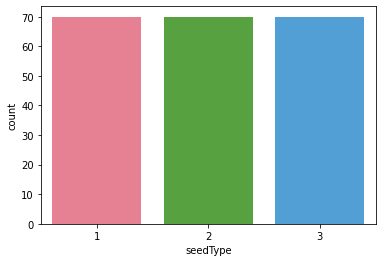

In [ ]:
display(HTML(' <h3>CANTIDAD DE DATOS DISPONIBLES DE CADA CLASE</h3>'))
sns.countplot(df['seedType'],palette="husl")

Por otro lado, seaborn nos probee de una función para ver las relaciones entre cada una de las variables.


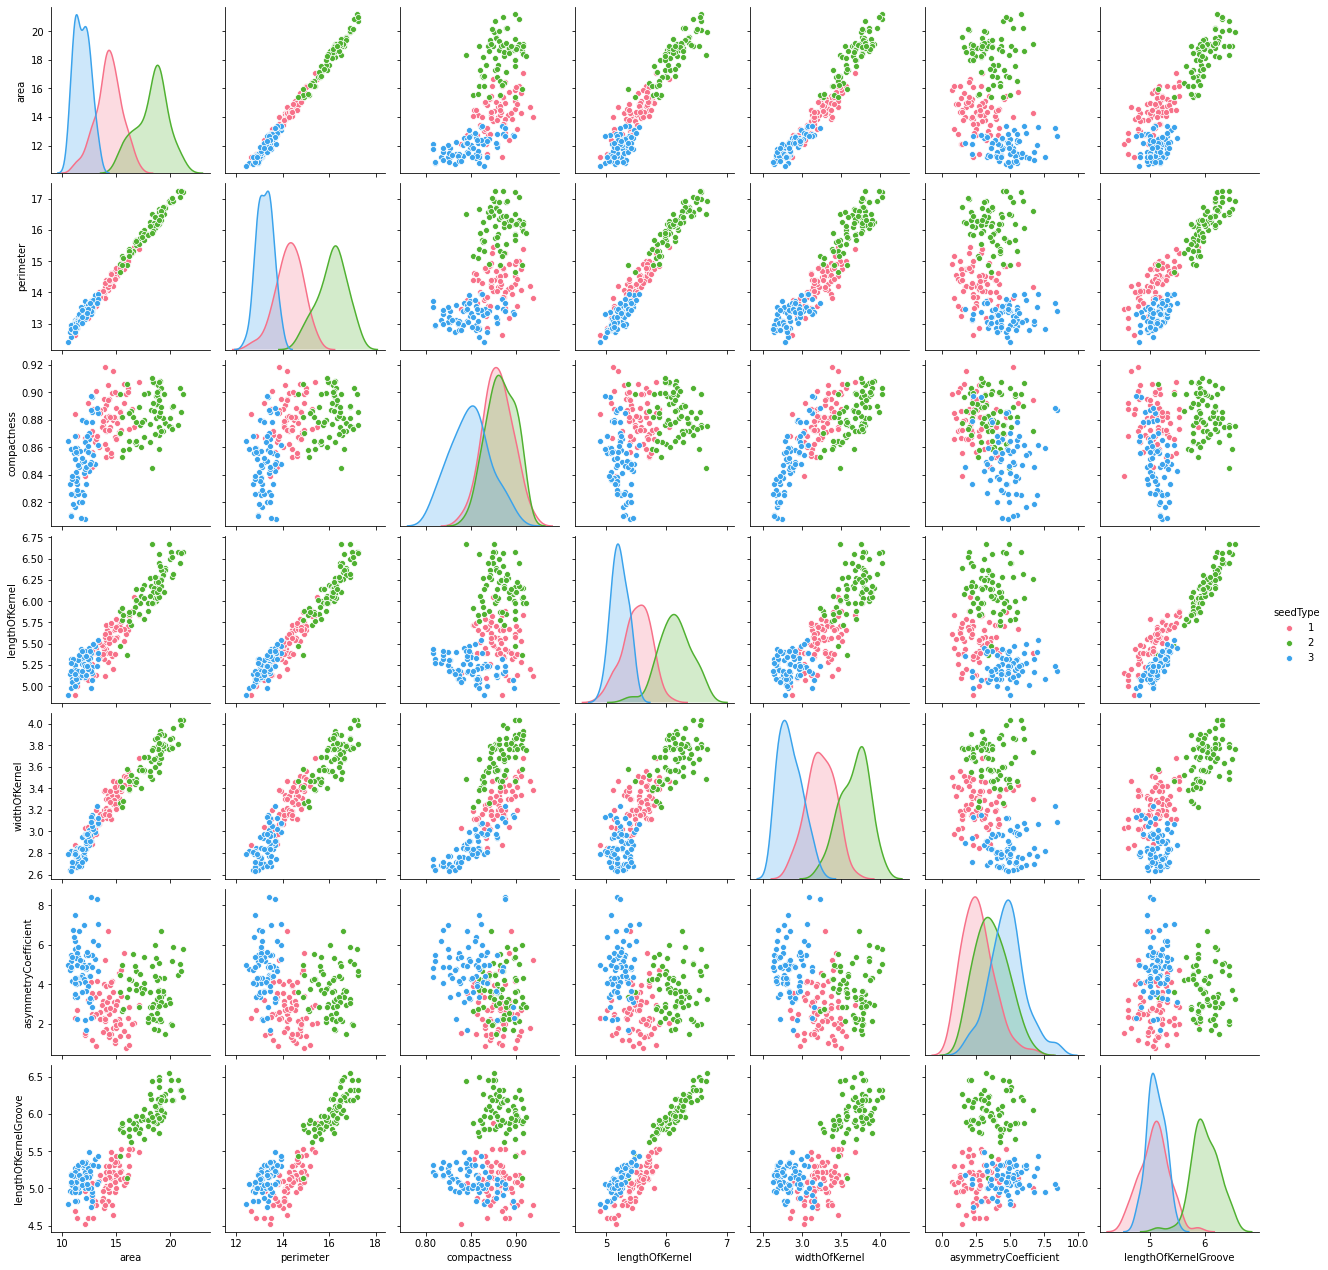

In [ ]:
sns.pairplot(df,hue="seedType", palette="husl")

Si nos fijamos en la gráfica los datos están distribuidos de manera casi uniforme sobretodo los correspondientes al trigo clase 3 (verde), mientras que los correspondientes al trigo clase 2 (azul) y clase 1 (rosa) tienen cualidades algo parecidas por lo que se solapan. En algunas ocasiones la clase 3 y 1 también se superponen, por lo que podemos concluir que también tienen algunas características similares. 

# RNA SUPERVISADA

Primero vamos a trabajar con los datos para entrenar una red supervisada, a este tipo de red le debemos de pasar los targets o salidas deseadas. Antes que nada, tenemos de preparar los datos para poder pasarselos a la red. Tenemos que separar los datos de entrada y de salida, asi como normalizarlos y codificarlos de manera adecuada. 

## Preprocesamiento de los datos

Vamos a mezclar los datos, ya que estos se encuentran en orden: primero los de la clase 1, luego los de la 2 y finalmente los de la 3. 

In [ ]:
df1 = df.sample(frac = 1, random_state= 3)

In [ ]:
df1.head()

area  perimeter  ...  lengthOfKernelGroove  seedType
164  11.14      12.79  ...                 5.049         3
86   18.88      16.26  ...                 6.109         2
122  16.17      15.38  ...                 5.703         2
168  11.35      13.12  ...                 5.132         3
128  20.16      17.03  ...                 6.185         2

[5 rows x 8 columns]

Una vez hecho esto, lo que hacemos es separar los datos en entradas (X) y salidas deseadas o targets (y).

In [ ]:
X= df1.drop('seedType', axis = 1)
y = df1["seedType"]

In [ ]:
display(HTML(' <h4>DATOS DE ENTRADA</h4>'))
X.head()

area  perimeter  ...  asymmetryCoefficient  lengthOfKernelGroove
164  11.14      12.79  ...                 6.388                 5.049
86   18.88      16.26  ...                 1.649                 6.109
122  16.17      15.38  ...                 4.286                 5.703
168  11.35      13.12  ...                 4.337                 5.132
128  20.16      17.03  ...                 1.910                 6.185

[5 rows x 7 columns]

### Normalizamos los datos
Como vemos en el grafico a continuación, para diferentes features los valores son muy diferentes por lo que debemos normalizar los datos para evitar que las variables con una gran dispersión tengan un mayor impacto en la medida de la similaridad.

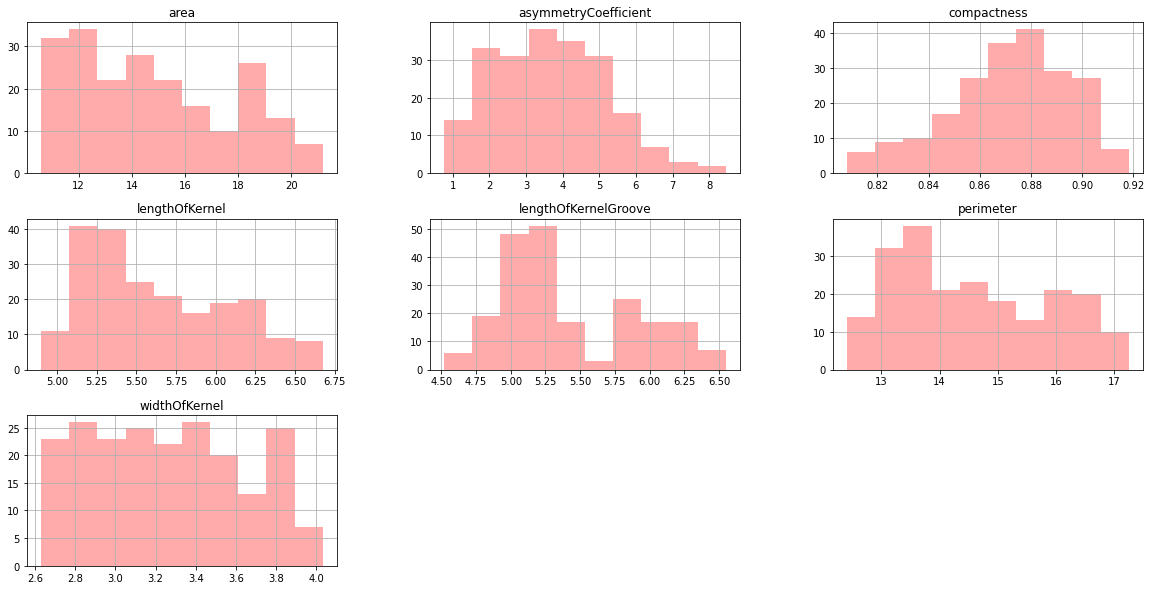

In [ ]:
color_list = ['#AFCBFF','#85E3FF', '#C5A3FF', '#F6A6FF', '#FFABAB',
              '#FFF5BA', '#FFCCF9']

X.hist(figsize=(20,10),facecolor=color_list[4])
plt.show()

In [ ]:
feature_name = X.columns
scaler = MinMaxScaler()
X[feature_name]=scaler.fit_transform(X[feature_name])

area   perimeter  ...  asymmetryCoefficient  lengthOfKernelGroove
count  210.000000  210.000000  ...            210.000000            210.000000
mean     0.402032    0.444067  ...              0.381633              0.437751
std      0.274759    0.269826  ...              0.195498              0.241989
min      0.000000    0.000000  ...              0.000000              0.000000
25%      0.158640    0.214876  ...              0.233575              0.258986
50%      0.355524    0.394628  ...              0.368474              0.346627
75%      0.634089    0.682851  ...              0.520570              0.668636
max      1.000000    1.000000  ...              1.000000              1.000000

[8 rows x 7 columns]

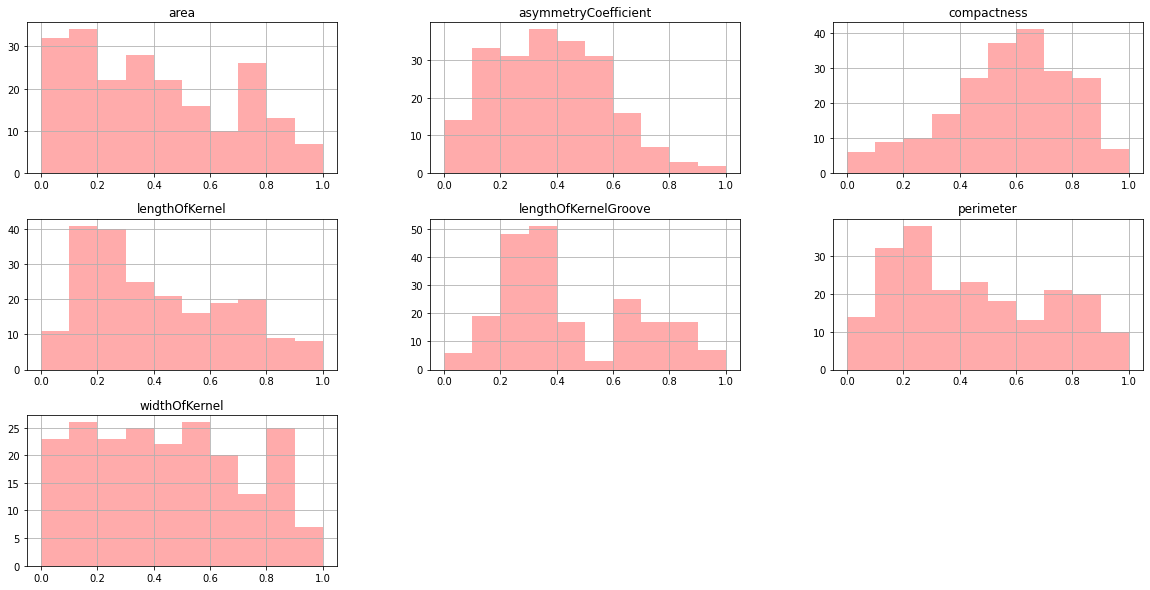

In [ ]:
display(HTML(' <h4>DATOS DE ENTRADA NORMALIZADOS</h4>'))

display(X.describe())

X.hist(figsize=(20,10),facecolor=color_list[4])
plt.show()

### One-hot encoding a la salida
La API de Keras no puede trabajar con datos categoricos directamente, por lo que tenemos que usar también una codificación para los targets. Usamos hot encoding, representando las clases del 1 al 3 como un conjunto de nueve ceros y un solo uno. La clase correspondiente estará determinada por la ubicación del número 1. 

In [ ]:
y_encoded =  pd.get_dummies(y)
display(y_encoded)

1  2  3
164  0  0  1
86   0  1  0
122  0  1  0
168  0  0  1
128  0  1  0
..  .. .. ..
200  0  0  1
184  0  0  1
131  0  1  0
152  0  0  1
106  0  1  0

[210 rows x 3 columns]

### Separar en datos de entrenamiento, testeo y validación

Para ello utilizamos la función *train_test_split* que nos provee *sklearn* que nos particiona el dataset en dos subsets de datos en la proporción y con la aleatorieidad que nostros le indiquemos. En este caso, la usamos dos veces, una para dividir en datos de entrenamiento y datos de testeo. Luego, los datos de entrenamiento los particionamos nuevamente para obetener un subset de validación que pasarle al nuestra red neuronal. 

Con el fin de evitar el *sobreajuste*, es necesario contar con un conjunto de datos de validación, además de los conjuntos de datos de entrenamiento y testeo. Si se busca el clasificador más adecuada para un determinado problema, la formación de datos se utiliza para entrenar los algoritmos de candidatos, la validación de datos se utiliza para comparar sus actuaciones y decidir cuál tomar y, por último, los datos de testeo se utilizan para obtener las características de rendimiento del modelo. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size = 0.2, random_state = 1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
print("Validating set has {} samples.".format(X_val.shape[0]))

Training set has 126 samples.
Testing set has 42 samples.
Validating set has 42 samples.


In [ ]:
display(HTML(' <h4>DATOS DE ENTRADA PARA ENTRENAMIENTO</h4>'))
display(X_train.head())

display(HTML(' <h4>DATOS DE ENTRADA PARA TESTEO</h4>'))
display(X_test.head())

display(HTML(' <h4>DATOS DE ENTRADA PARA VALIDAR</h4>'))
display(X_val.head())

area  perimeter  ...  asymmetryCoefficient  lengthOfKernelGroove
190  0.032106   0.080579  ...              0.602387              0.258986
71   0.590179   0.673554  ...              0.508380              0.668636
108  0.882908   0.931818  ...              0.323356              1.000000
147  0.179415   0.216942  ...              0.475354              0.237814
125  0.770538   0.778926  ...              0.445058              0.725258

[5 rows x 7 columns]

area  perimeter  ...  asymmetryCoefficient  lengthOfKernelGroove
118  0.783758   0.789256  ...              0.373675              0.712457
150  0.117092   0.169421  ...              0.575992              0.387986
23   0.140699   0.169421  ...              0.084502              0.217627
0    0.440982   0.502066  ...              0.189302              0.345150
67   0.322946   0.388430  ...              0.188782              0.301822

[5 rows x 7 columns]

area  perimeter  ...  asymmetryCoefficient  lengthOfKernelGroove
176  0.063267   0.123967  ...              0.594196              0.282127
25   0.528801   0.568182  ...              0.017930              0.387986
93   0.755430   0.752066  ...              0.680792              0.668636
116  0.790368   0.783058  ...              0.464042              0.606105
24   0.417375   0.485537  ...              0.133391              0.237322

[5 rows x 7 columns]

### Seteamos los parámetros de la red neuronal

In [ ]:
epochs = 30
batch_size = 128
verbose = 0
classes = 3

optimizer = 'Adam'
loss ='binary_crossentropy'
hidden = 256
validation_split = 0.1
dropout = 0.1

### Armamos la arquitectura de la red neuronal

In [ ]:
model = Sequential()
model.add(Dense(hidden, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(dropout))
model.add(Dense(hidden, activation = 'relu'))
model.add(Dropout(dropout))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
__________________________________________________

### Entrenamos la red con los datos de entrenamiento y validación

In [ ]:
history=model.fit(X_train, y_train, 
                  batch_size=batch_size, 
                  verbose = verbose,
                  epochs=epochs,
                  validation_data=(X_val,y_val))

### Evaluamos el entrenamiento de nuestra red neuronal

In [ ]:
score = model.evaluate(X_test, y_test, verbose = verbose)
print('Accuracy is {:.2f}%'.format((score[1])*100))

Accuracy is 93.65%


Vemos que con tan solo 30 épocas de entrenamiento logramos una buena precisión con nuestro modelo. 

### Graficamos los errores y la precisión de cada epoca 

In [ ]:
def draw_history(history):
    h = history.history
    epochs = range(1, len(h["loss"]) + 1)
    plt.figure(1, figsize=(16, 14))
    plt.clf()
    
    # primer gráfico
    plt.subplot(221)
    plt.plot(epochs, h["loss"], "mo", label="Error del entrenamiento",color = color_list[2])
    plt.plot(epochs, h["val_loss"], "m", label="Error de validación",color = color_list[2])
    plt.xlabel("Épocas")
    plt.ylabel("Error")
    plt.legend()
    
    # segundo gráfico
    plt.subplot(222)
    plt.plot(epochs, h["accuracy"], "co", label="Precisión del entrenamiento",color=color_list[6])
    plt.plot(epochs, h["val_accuracy"], "c", label="Precisión de validación",color=color_list[6])
    plt.xlabel("Épocas")
    plt.ylabel("Precisión")
    plt.legend()

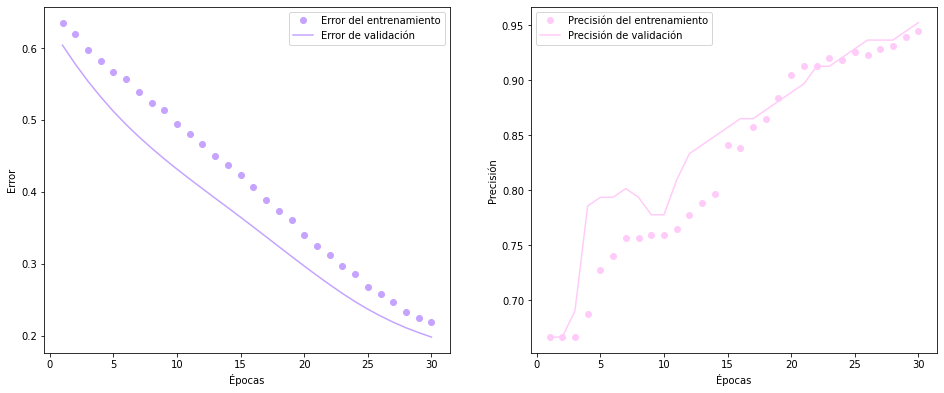

In [ ]:
draw_history(history)

Como vemos, logramos una precisión de casi el 94%, sin embargo podemos probar variar un poco los hiperparámetros y arquitectura de nuestra red para ver si conseguimos mejorar la precisión aún más.

In [ ]:
#Seteamos los hiperparametros
epochs = 120
batch_size = 128
verbose = 0
classes = 3

optimizer = 'Adam'
loss ='binary_crossentropy'
hidden = 256
validation_split = 0.1
dropout = 0.5

#Definimos la arquitecura de nuestra red nuevamente 
model = Sequential()
model.add(Dense(hidden, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(dropout))
model.add(Dense(hidden, activation = 'relu'))
model.add(Dropout(dropout))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 771       
_________________________________________________________________
activation_8 (Activation)    (None, 3)                 0         
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
_________________________________________________

In [ ]:
#Entrenamos la red 
history=model.fit(X_train, y_train, 
                  batch_size=batch_size, 
                  verbose = verbose,
                  epochs=epochs,
                  validation_data=(X_val,y_val))

Accuracy is 98.41%


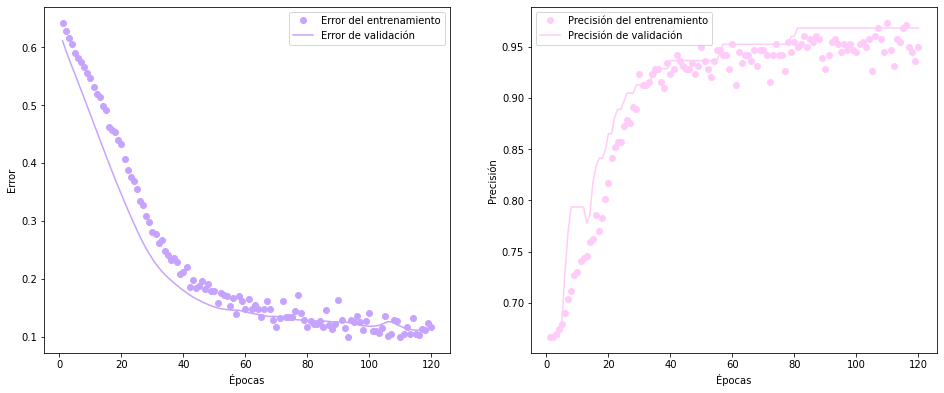

In [ ]:
score = model.evaluate(X_test, y_test, verbose = verbose)
print('Accuracy is {:.2f}%'.format((score[1])*100))

draw_history(history)

Se puede apreciar cómo va disminuyendo el error a medida que se fue entrenando la RNA. Vemos que el error de entrenamiento se parece al error de validación, por lo que podemos deducir que la red está bien entrenada. Además, no se presenta un punto de inflexión, por lo que se deduce que no hubo sobreajuste durante el entrenamiento.

Con este segundo modelo vemos que conseguimos una precisión del 98.41%, muy superior a la lograda con el modelo anterior. Podemos concluir entonces en que logramos un buen clasificador con este modelo.


### Guardamos la historia de nuestro modelo 

In [ ]:
hist_df = pd.DataFrame(history.history) 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

## Probamos el clasificador con los datos de testeo

In [ ]:
#Chequear esta funcion
def predict_kind_seed(X_test,y_test, model):
    
    results = pd.DataFrame(columns=('Prediccion', 'Target','Pretencia clase 1', 
                                    'Pertenencia clase 2', 'Pertenencia clase 3'))
    Y_pred = model.predict(X_test)
    i =0
    
    for class_percentage in Y_pred:
        predict = np.argmax(class_percentage) + 1
        target = y_test.iloc[i].idxmax(axis=1)
        class1, class2, class3 = round(class_percentage[0]*100), round(class_percentage[1]*100),round(class_percentage[2]*100)
        dict = {'Prediccion':predict, 'Target':target,
                'Pretencia clase 1':class1, 'Pertenencia clase 2':class2,
                'Pertenencia clase 3':class3}
        results = results.append(dict,ignore_index=True)
        i+=1

    #display(results)
    return results

In [ ]:
results = predict_kind_seed(X_test,y_test, model)
display(results)

Prediccion  Target  ...  Pertenencia clase 2  Pertenencia clase 3
0          2.0     2.0  ...                 97.0                  0.0
1          3.0     3.0  ...                  0.0                100.0
2          1.0     1.0  ...                  0.0                 41.0
3          1.0     1.0  ...                  5.0                  0.0
4          1.0     1.0  ...                  2.0                  2.0
5          1.0     1.0  ...                 27.0                  1.0
6          2.0     2.0  ...                 95.0                  0.0
7          1.0     1.0  ...                  4.0                  2.0
8          3.0     3.0  ...                  0.0                 98.0
9          1.0     1.0  ...                  8.0                  0.0
10         3.0     3.0  ...                  0.0                 92.0
11         2.0     2.0  ...                100.0                  0.0
12         2.0     2.0  ...                 83.0                  0.0
13         3.0     3.0  ...                  0.0                 61.0
14         1.0     1.0  ...                  0.0                  0.0
15         2.0     2.0  ...                100.0                  0.0
16         1.0     1.0  ...                  0.0                 40.0
17         2.0     2.0  ...                 96.0                  0.0
18         1.0     1.0  ...                  1.0                  0.0
19         1.0     1.0  ...                  2.0                  0.0
20         2.0     2.0  ...                 78.0                  0.0
21         1.0     1.0  ...                  1.0                  1.0
22         2.0     2.0  ...                100.0                  0.0
23         3.0     3.0  ...                  0.0                 99.0
24         3.0     3.0  ...                  0.0                 95.0
25         1.0     2.0  ...                  1.0                  0.0
26         2.0     2.0  ...                 59.0                  0.0
27         3.0     3.0  ...                  0.0                100.0
28         2.0     2.0  ...                 99.0                  0.0
29         3.0     3.0  ...                  0.0                 99.0
30         1.0     1.0  ...                  1.0                  1.0
31         1.0     1.0  ...                  0.0                  2.0
32         1.0     1.0  ...                 18.0                  4.0
33         1.0     1.0  ...                  0.0                  3.0
34         3.0     3.0  ...                  0.0                100.0
35         3.0     3.0  ...                  0.0                100.0
36         1.0     1.0  ...                  0.0                  0.0
37         3.0     3.0  ...                  0.0                 93.0
38         1.0     1.0  ...                  1.0                  0.0
39         2.0     2.0  ...                 99.0                  0.0
40         3.0     3.0  ...                  0.0                 86.0
41         2.0     2.0  ...                 98.0                  0.0

[42 rows x 5 columns]

Como se puede ver el dataframe de arriba el clasificador predijo correctamente el 100% de las clases de trigo, con una certeza bastante alta para la mayoría de los casos (nivel de pertenencia a la clase).



## Guardo los datos de las predicciones realizadas

In [ ]:
pred_csv_file = 'predicciones.csv'
with open(pred_csv_file, mode='w') as f:
    results.to_csv(f)

# RNA NO SUPERVISADA (SOM)

Los mapas autoorganizados son un tipo de redes neuronales que utilizan para su entrenamiento el paradigma no supervisado. En este tipo de redes se trabaja solo con los datos de entrada, sin conocer la salida deseada. Es un método esencialmente exploratorio.

Esta red tiene como objetivo principal agrupar datos de muchas dimensiones de manera bidimensional (a través de un mapa bi-dimensional) y tratar de extraer alguna información útil de los datos. La reducción de dimensiones de gran cantidad de información a solamente un mapa bi-dimensional permite procesar y comprender patrones en los datos que de otra forma sería más complicado. 

Este tipo de red neuronal intenta imitar el comportamiento del cerebro en el tratamiento de la información. El cerebro se organiza, corrige errores y procesa nueva información sin tener referencias previas donde apoyarse. Es capaz de crear mapas mentales clasificando la información en determinadas zonas en base a los estímulos  que le llegan. Información con los mismos patrones de entrada o estímulos similares son clasificados en zonas próximas del cerebro. 


## Preparamos los datos 

Primero, eliminamos de nuestro dataframe la columna con los datos de salida ya que no vamos a alimentar a nuestra red con ellos. 

In [ ]:
X_som = df1.drop('seedType', axis = 1)

## Normalizamos los datos

In [ ]:
scaler = MinMaxScaler()
X_som=scaler.fit_transform(X_som)

Luego, convertimos el dataframe en un array de numpy, ya que con el tipo de datos que acepta la red SOM que vamos a utilizar.



In [ ]:
X_som = np.array(X_som)

In [ ]:
print(X_som)

[[0.05193579 0.0785124  0.43284936 ... 0.11689237 0.73111079 0.26095519]
 [0.78281398 0.79545455 0.80580762 ... 0.808268   0.11492803 0.78286558]
 [0.52691218 0.61363636 0.4600726  ... 0.53955809 0.45780078 0.58296406]
 ...
 [0.7884797  0.80785124 0.78130672 ... 0.85174626 0.27862799 0.70408666]
 [0.15769594 0.24586777 0.22867514 ... 0.14468995 0.51891196 0.41408173]
 [0.77998111 0.7768595  0.88475499 ... 0.83820385 0.27017644 0.8276711 ]]


## Entrenamos la red SOM con nuestros datos



In [ ]:
net = sps.somNet(30, 30, X_som, PBC=True)
net.train(0.01, 2000)
net.save('filename_weights')

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


## Graficamos la U-Matrix

La U-Matrix permite descubrir agrupamientos en los datos basándose en las distancias entre los vectores prototipos de celdas adyacentes. Habitualmente esta representación se hace  con un código de colores. En el caso del gráfico mostrado más abajo, los colores azules representan distancias bajas y los amarillos representan distancias altas. Los hexagonitos de colores son entonces la representación de las distancias a las celdas vecinas. 

Cuando las distancias son las más grandes aparecen divisiones del mapa, pudiendo así detectar regiones del mapa de celdas similares que muestran agrupamientos o clusters. Podemos observar dónde se produce el cambio de un grupo a otro. 


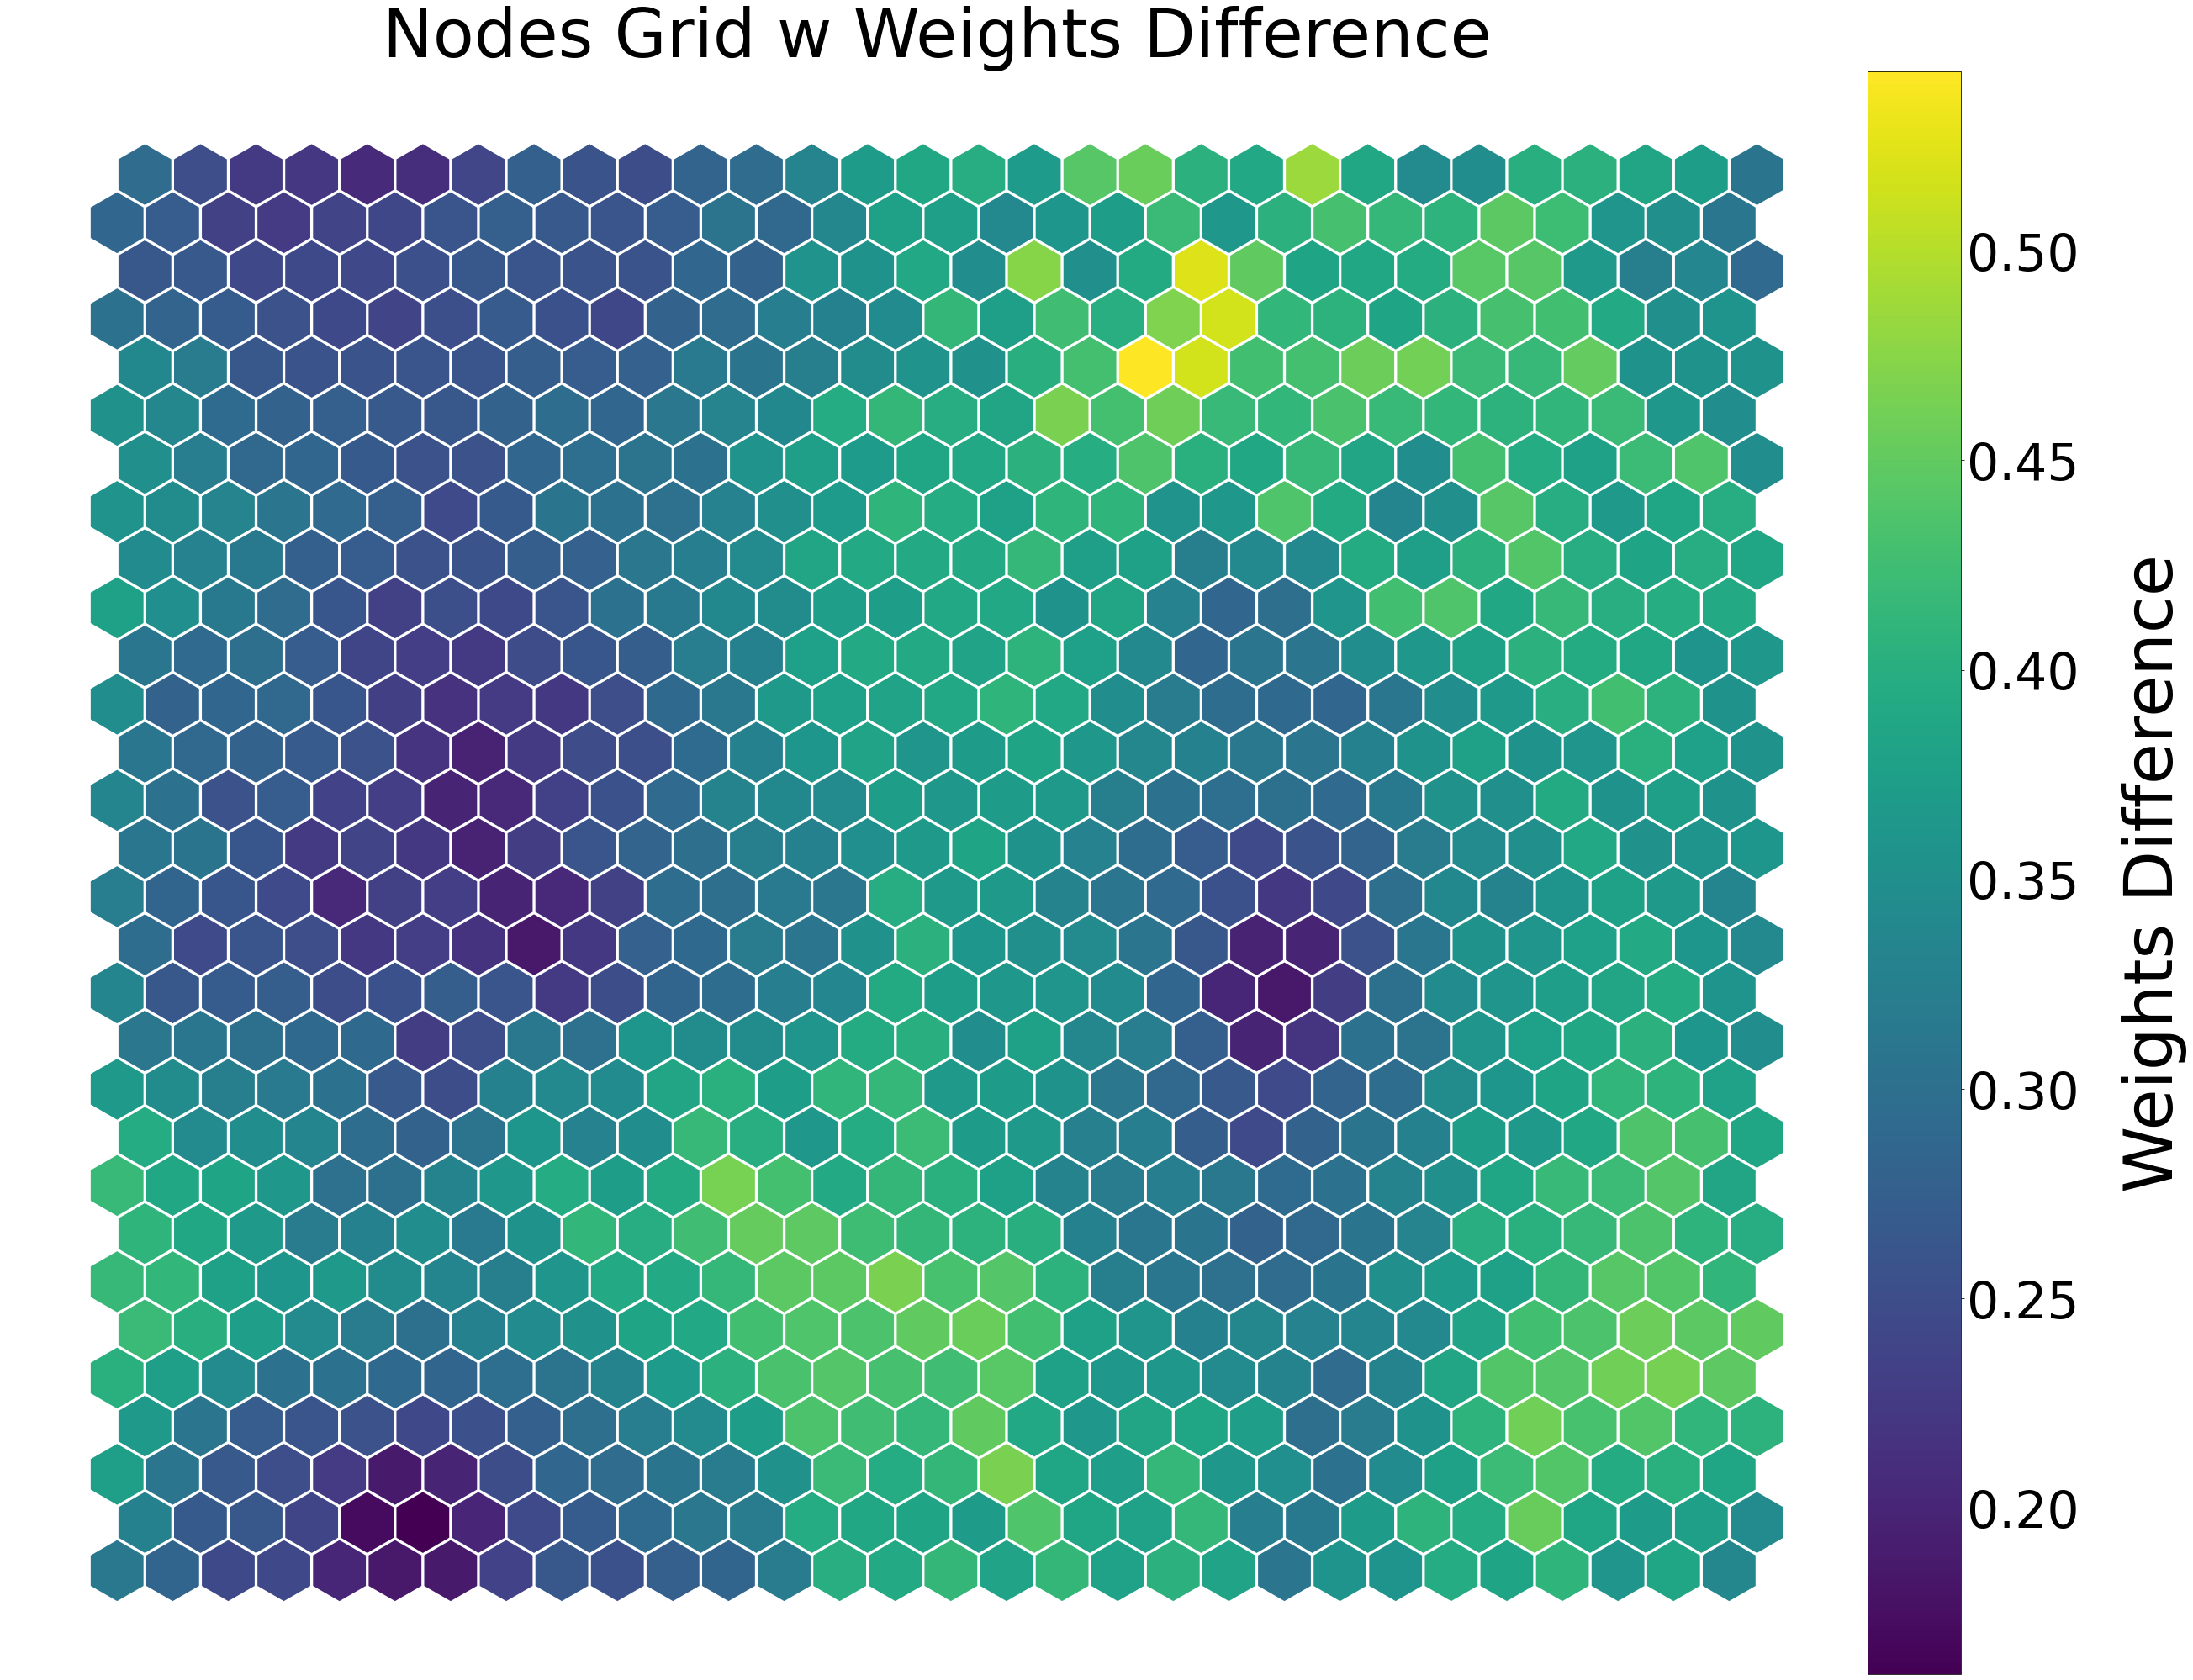

In [ ]:
net.diff_graph()

En el gráfico superior se observan tres regiones de color azul claramente separadas por algunas celdas que presentan distancias grandes entre sí (distancias entre los vectores prototipos). Vemos entonces que los BMUS más parecidos van a encontrarse divididos en tres grupos, esto se debe a que el conjunto de datos tiene tres clusters. 

Como vemos hay un cluster claramente diferenciado en la región derecha del mapa y otros dos grupos de datos que se solapan. Esto es coincidente con el analisis que hicimos al graficar con la función pairplot de seaborn (mostrada en la celda a continuación) para ver la relación entre cada una de las variables analizadas, los dos grupos a la izquierda del mapa son las dos clases que tienen cualidades algo parecidas, por lo que se solapan. 



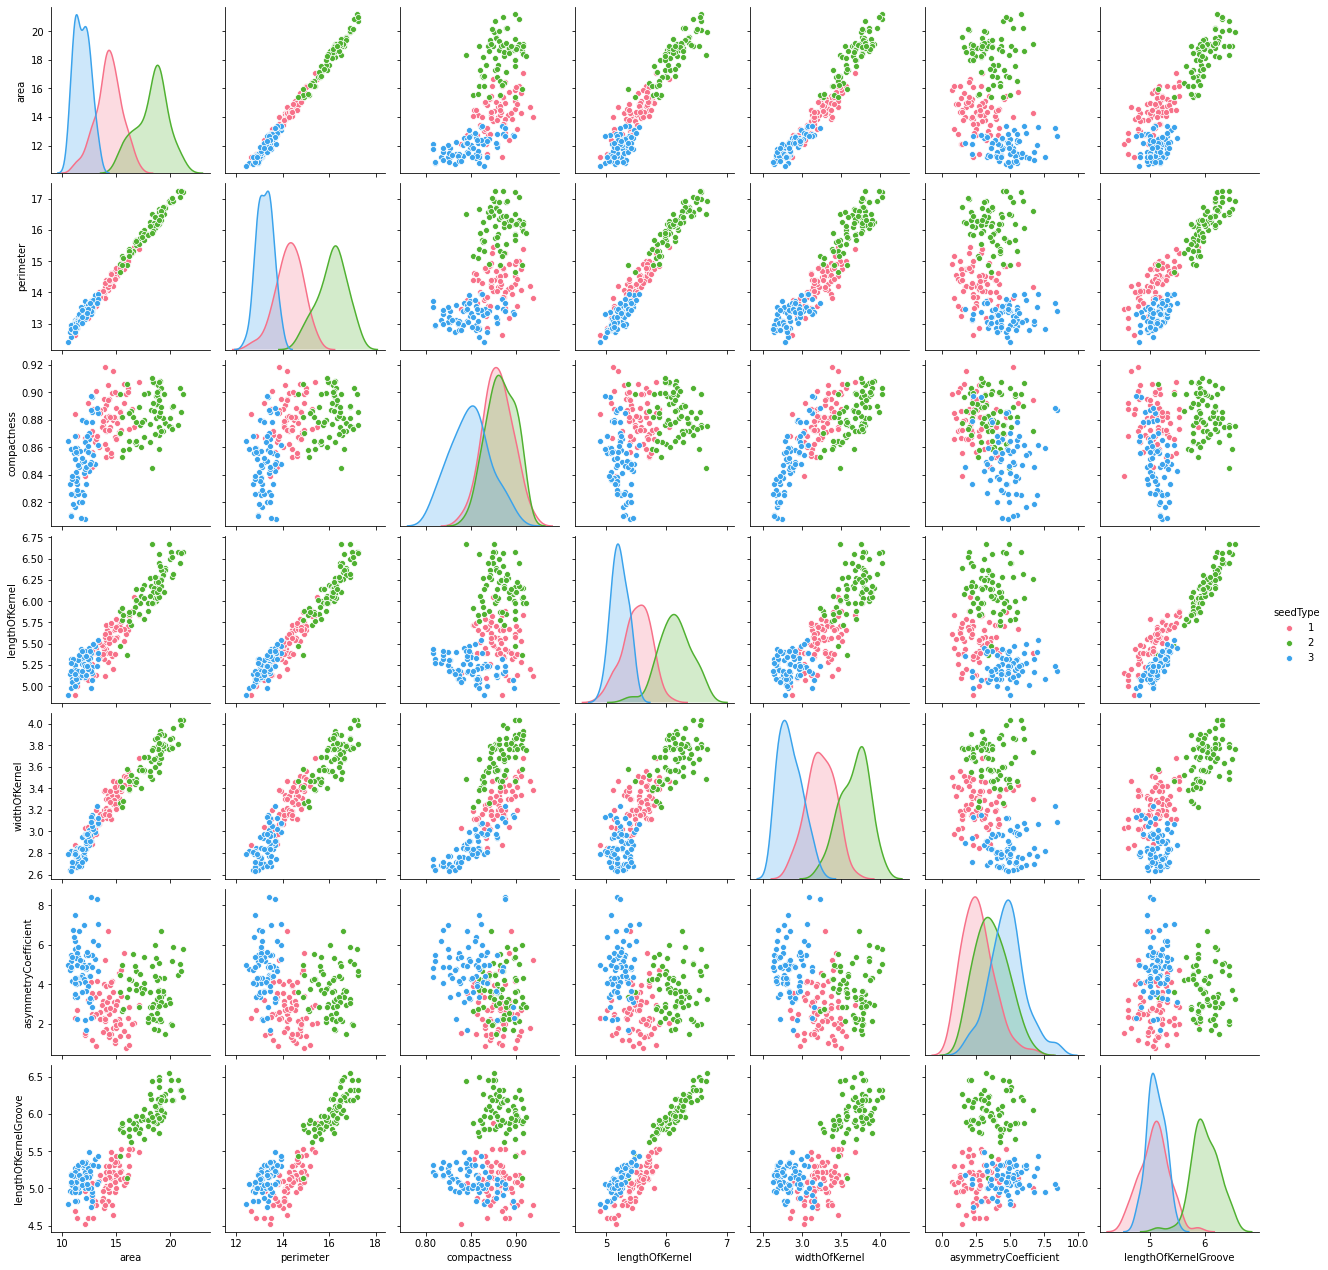

In [ ]:
sns.pairplot(df,hue="seedType", palette="husl")

## Graficamos los mapas de componentes 

Cada componente (feature) de los datos los vamos a representar en un mapa de componentes. Se muestra con una representación en color los valores que toma cada variable en el vector prototipo que contiene cada celda. 

Los vectores prototipos están compuestos por los valores de las diferentes variables que se representan en cada componente, por esto cuando una celda es elegida en uno de los mapas de componentes nos referimos al mismo vector prototipo y, por tanto, a la misma celda ubicada en el mismo lugar en cualquier a de los mapas de componentes. 

En este caso, observamos que los valores bajos de las variables son representados en la gama de los azules y los valores altos en la gama de los amarillos.




### Mapa de componenetes de la variable 'area'

Del grafico de componentes para esta variable podemos decir que los vectores prototipos del grupo que se encuentra más a la derecha en el mapa tienen valores de área elevados, mientras el resto de grupos tiene valores bajos. 

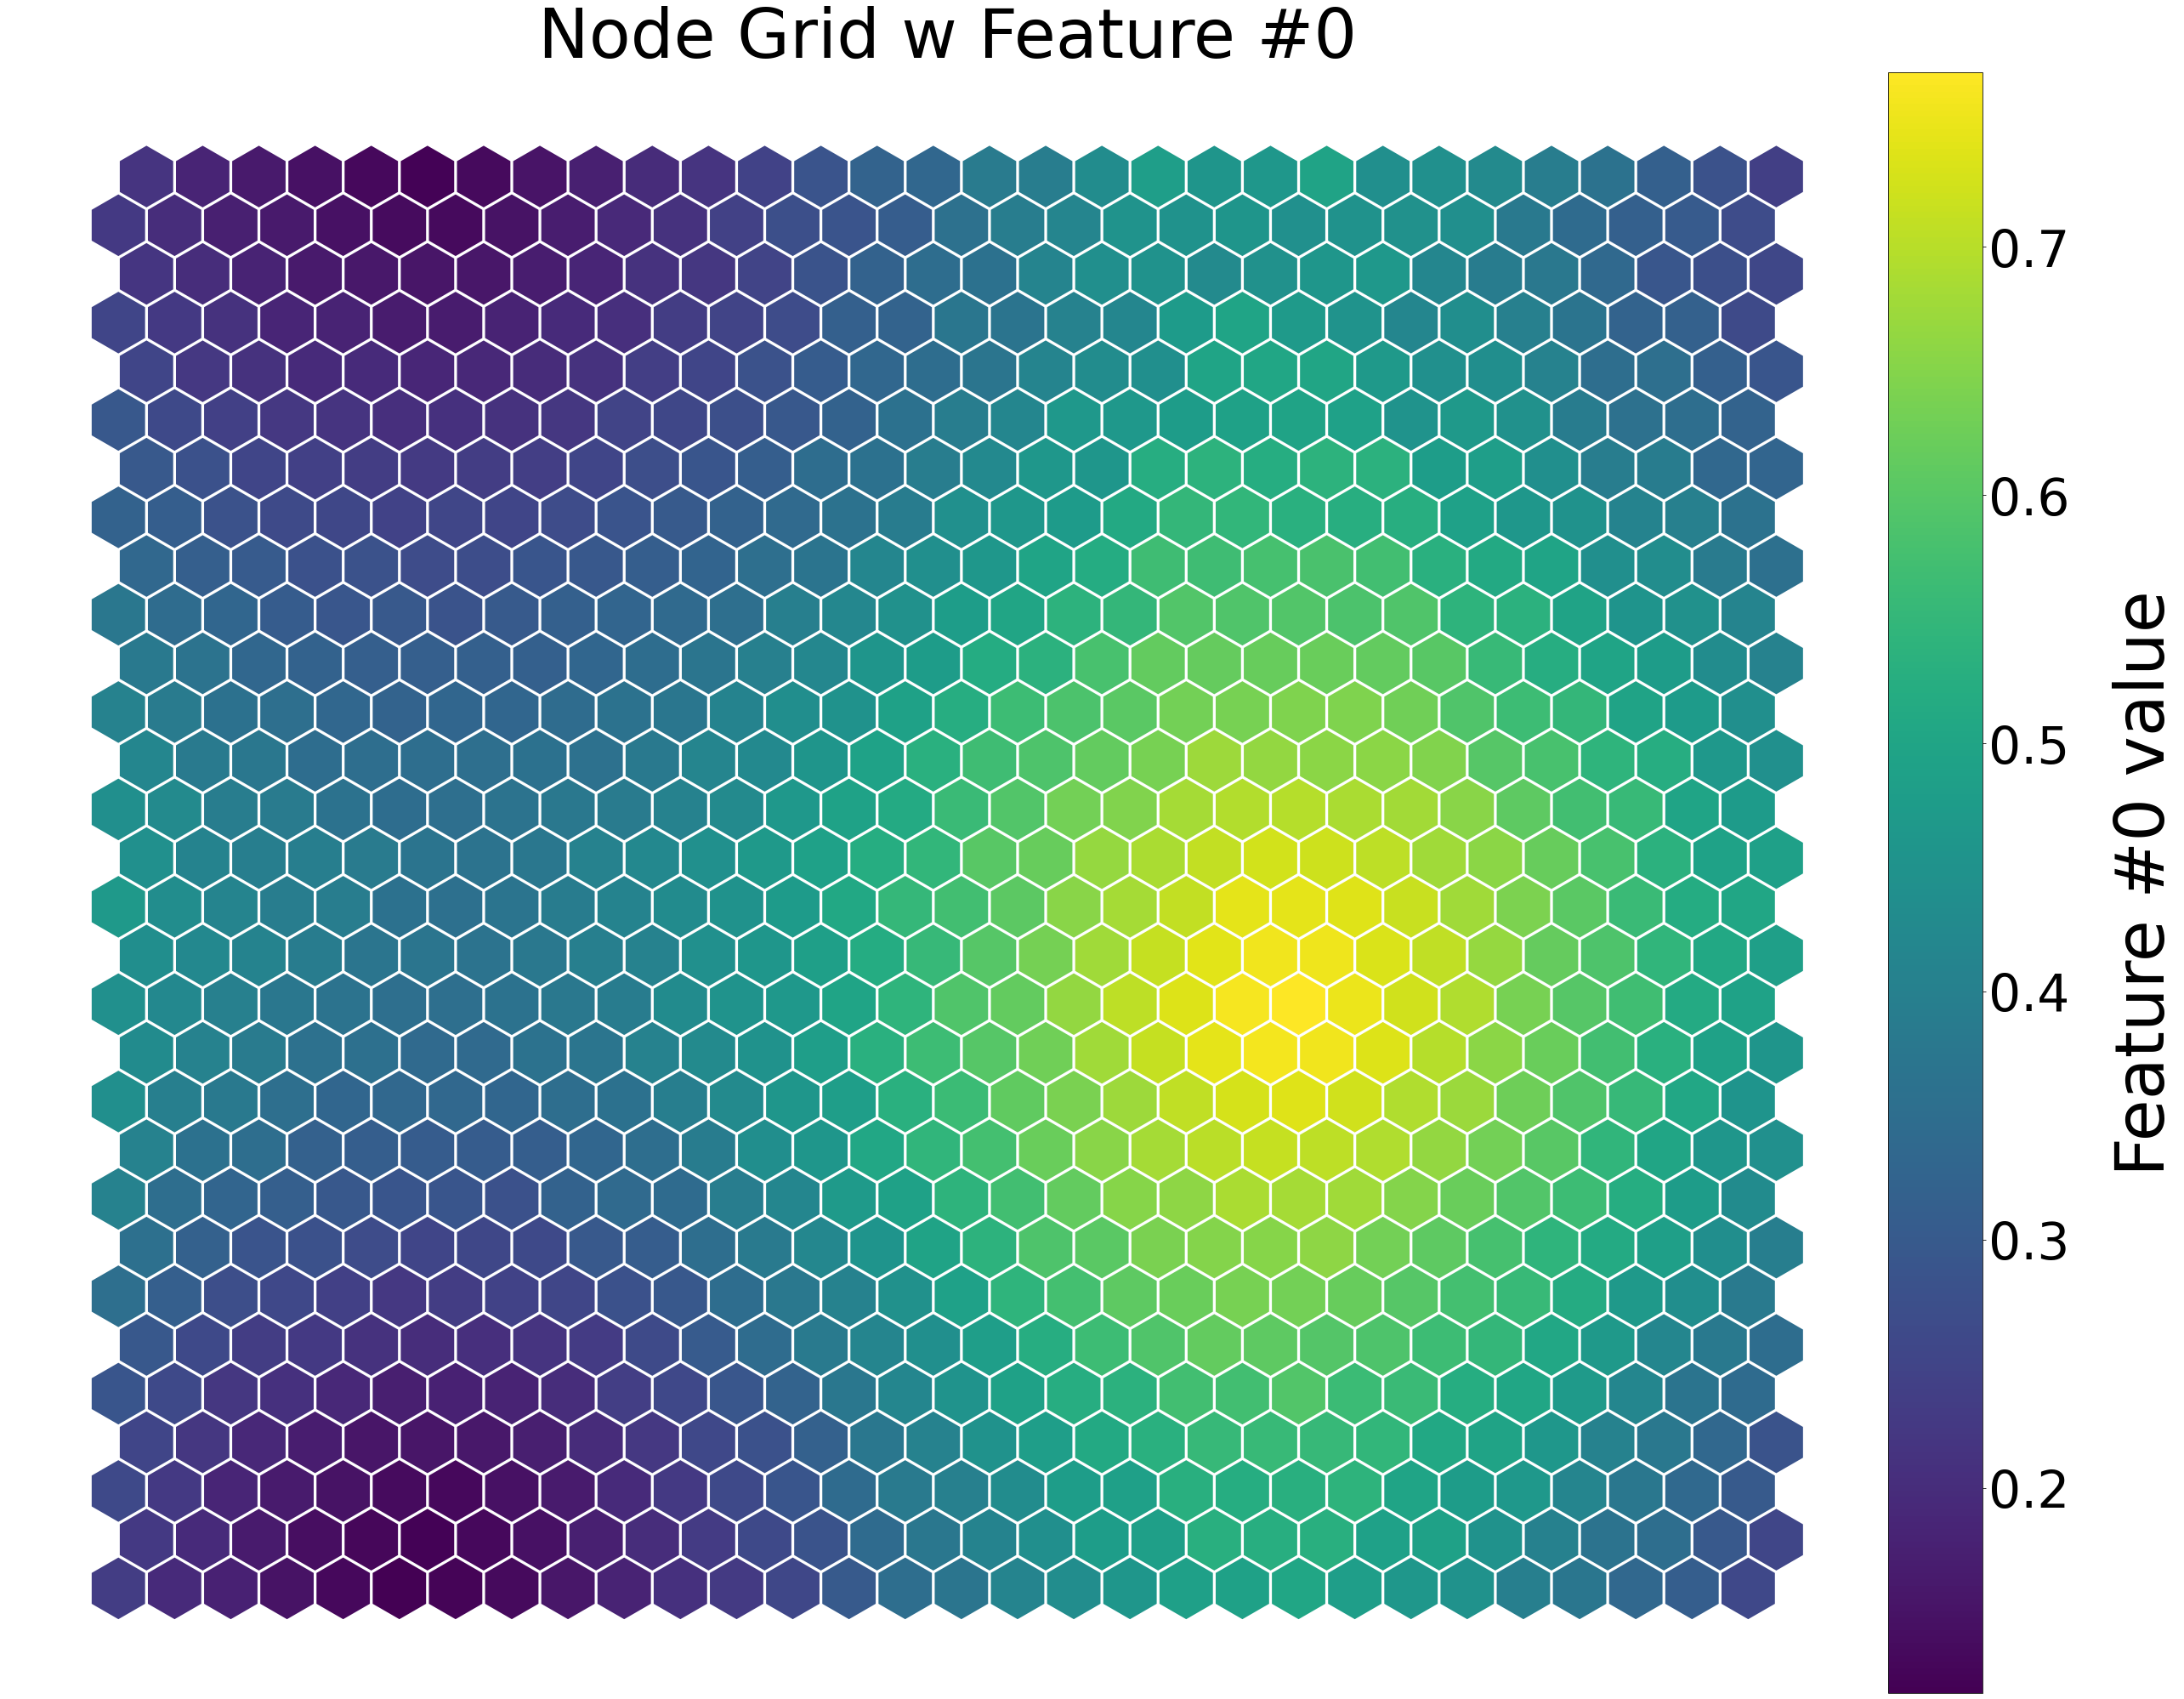

In [ ]:
net.nodes_graph(colnum=0)

### Mapa de componentes varible 'perimeter'

Del grafico de componentes para esta variable podemos decir que los vectores prototipos del grupo que se encuentra más a la derecha en el mapa tienen valores de perimetro elevados, mientras el resto de grupos tiene valores bajos. 


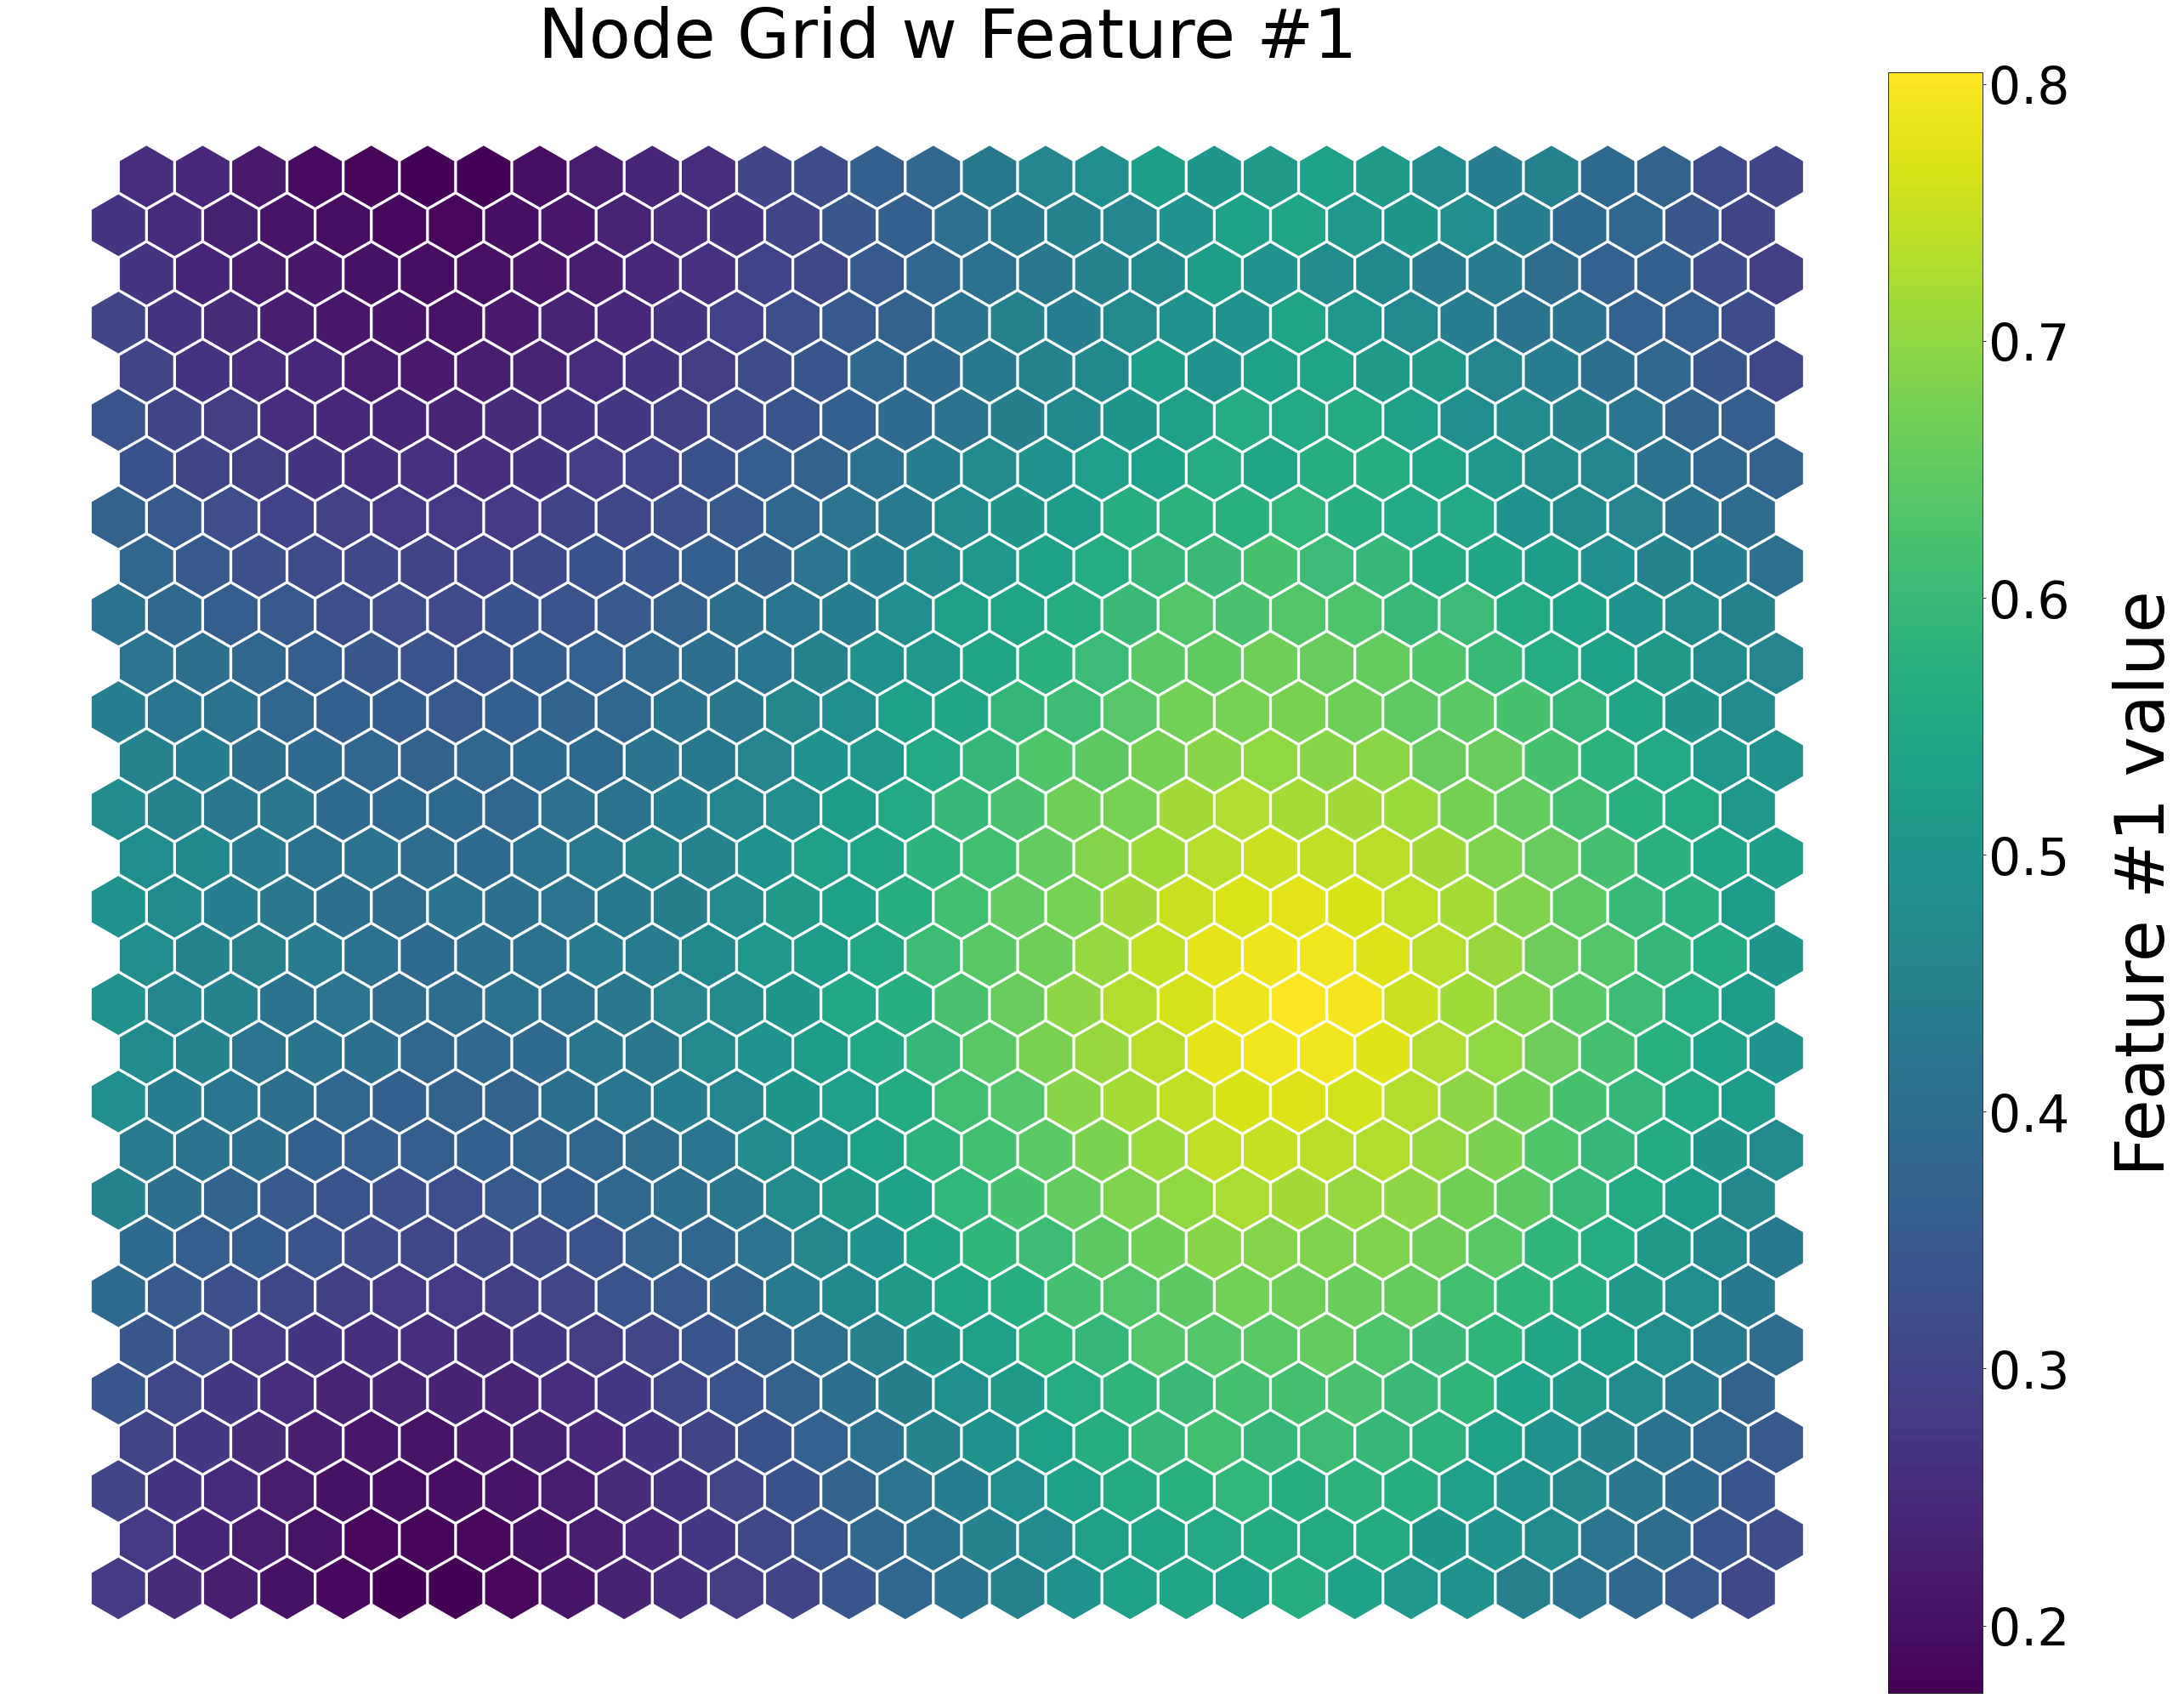

In [ ]:
net.nodes_graph(colnum=1)

### Mapa de componentes 'compactness'

Del grafico de componentes para esta variable podemos decir que los vectores prototipos del grupo que se encuentra más abajo en el mapa tienen valores de compacidad elevados, mientras el resto de grupos tiene valores bajos. 

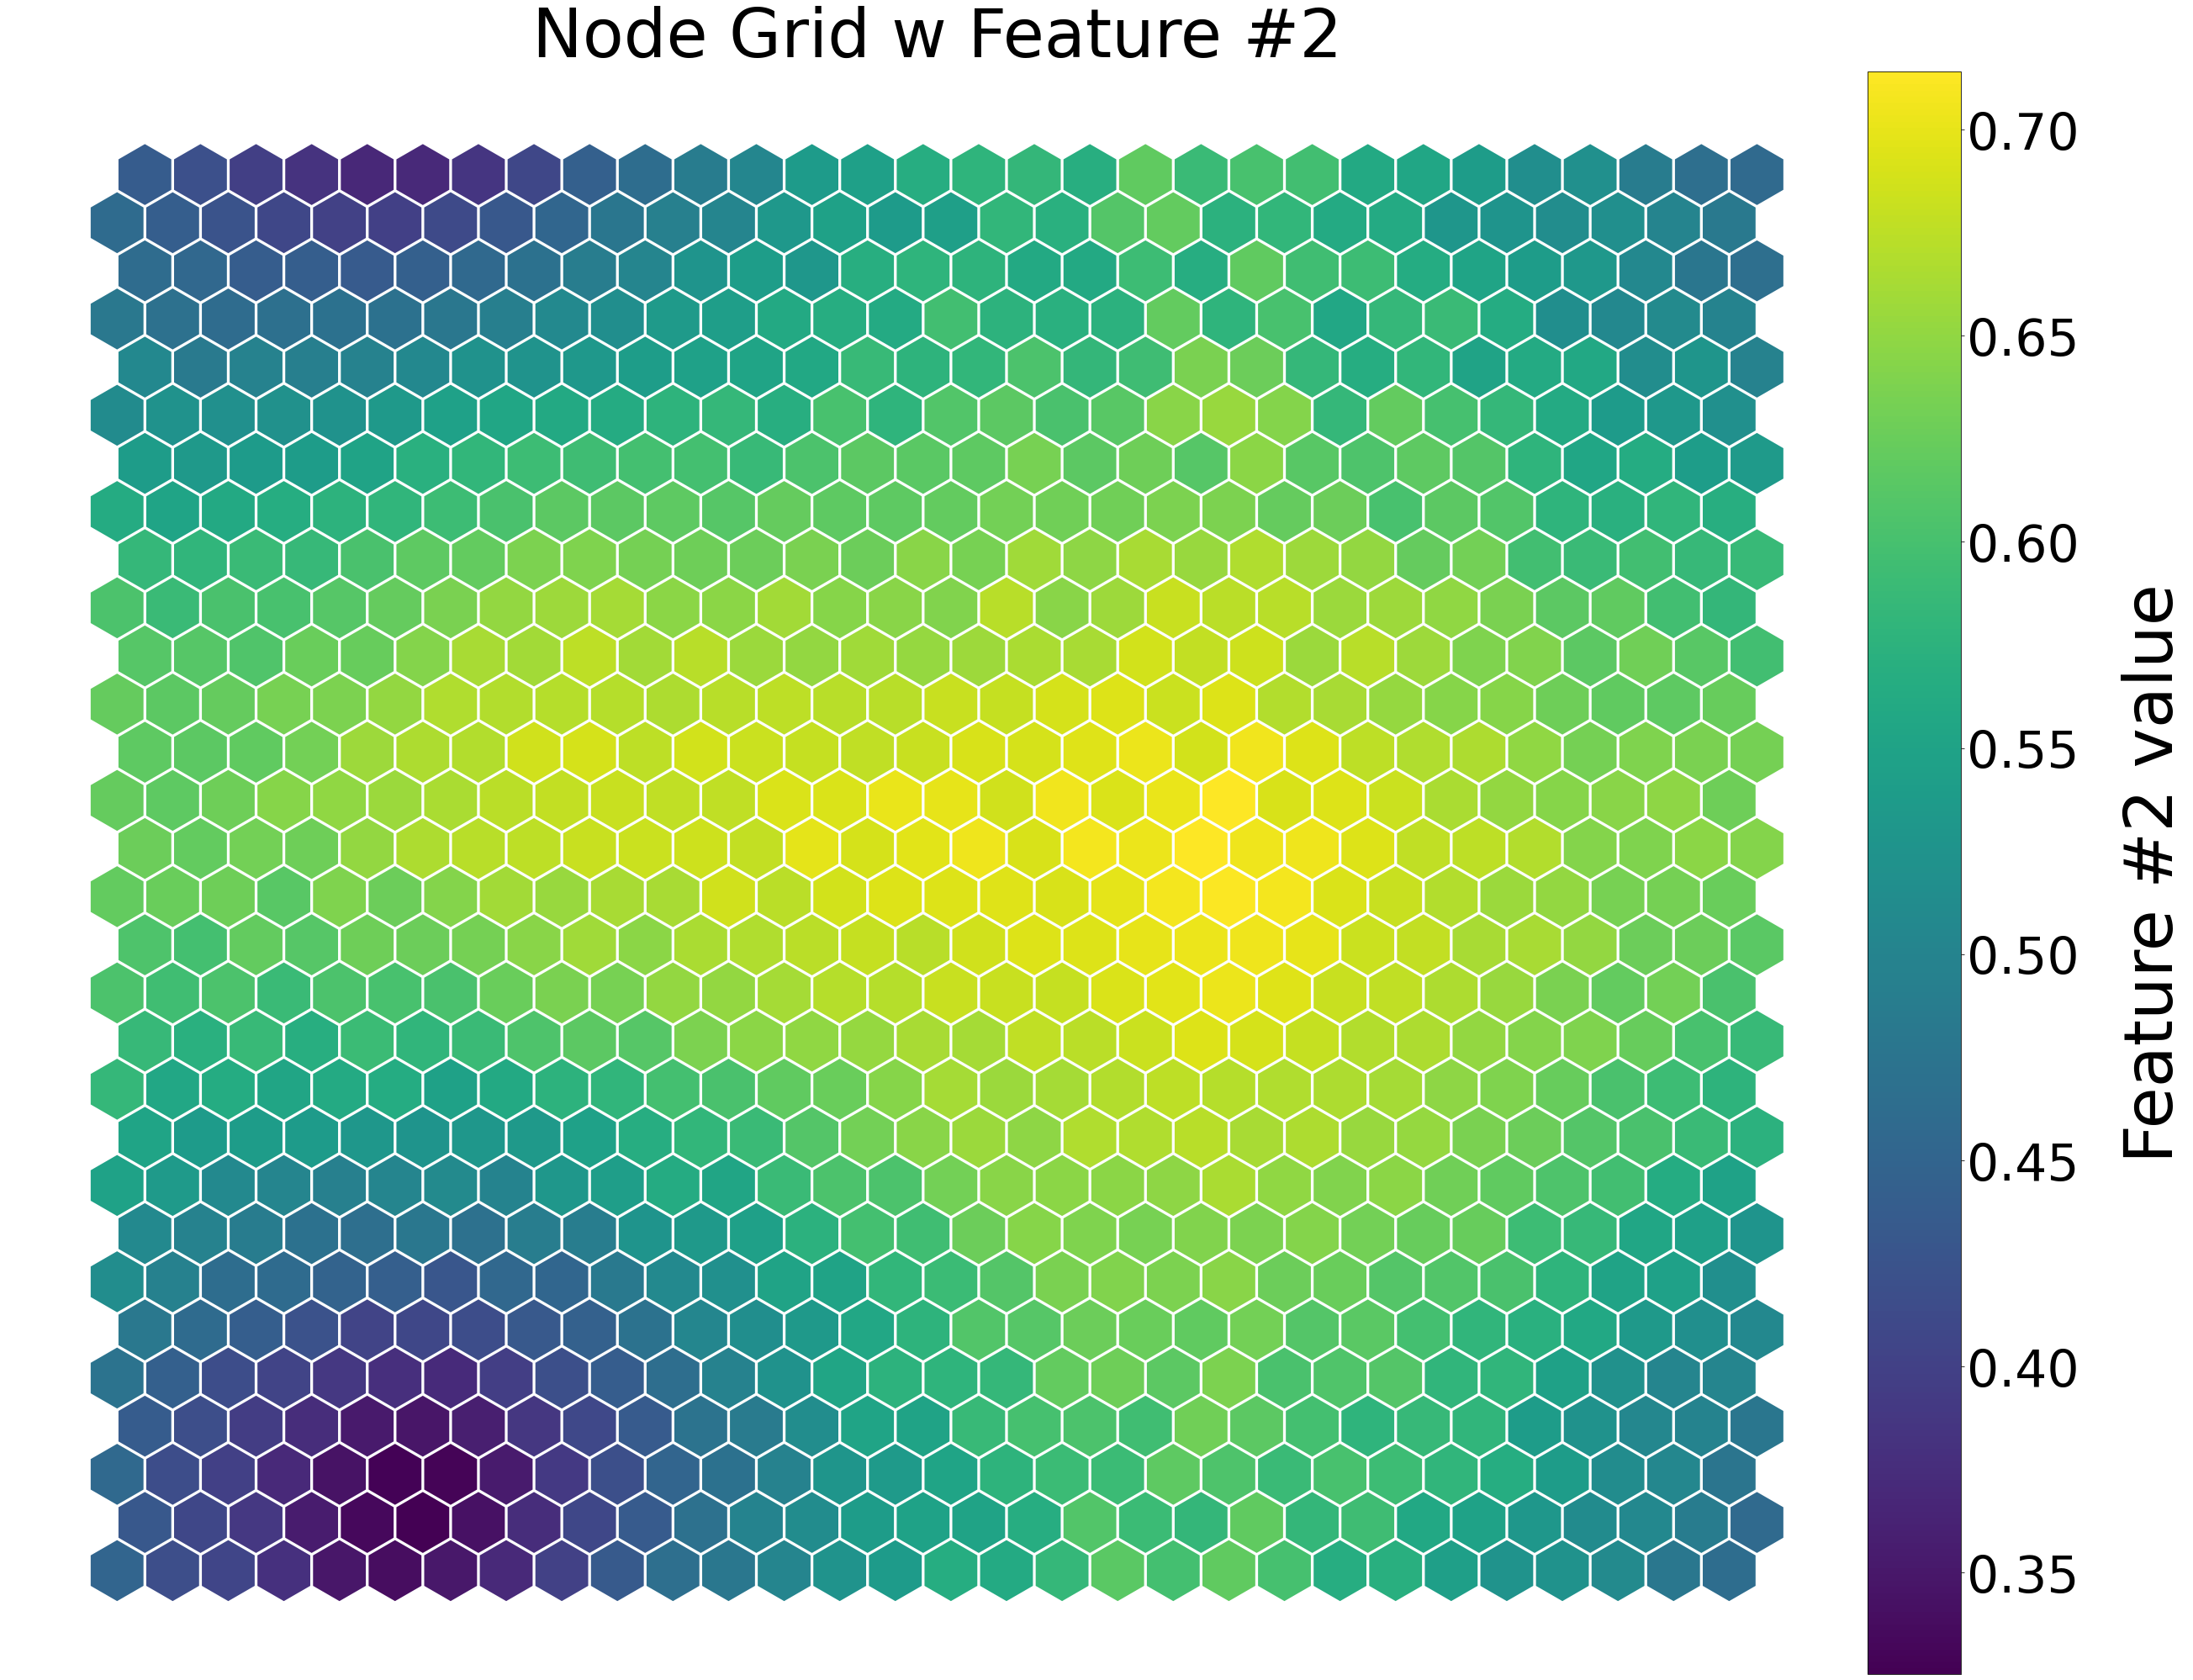

In [ ]:
net.nodes_graph(colnum=2)

### Mapa de componentes de la variable 'lengthOfKernel'

Del grafico de componentes para esta variable podemos decir que los vectores prototipos del grupo que se encuentra más a la derecha en el mapa tienen valores de longitud del grano elevados, mientras el resto de grupos tiene valores bajos. 

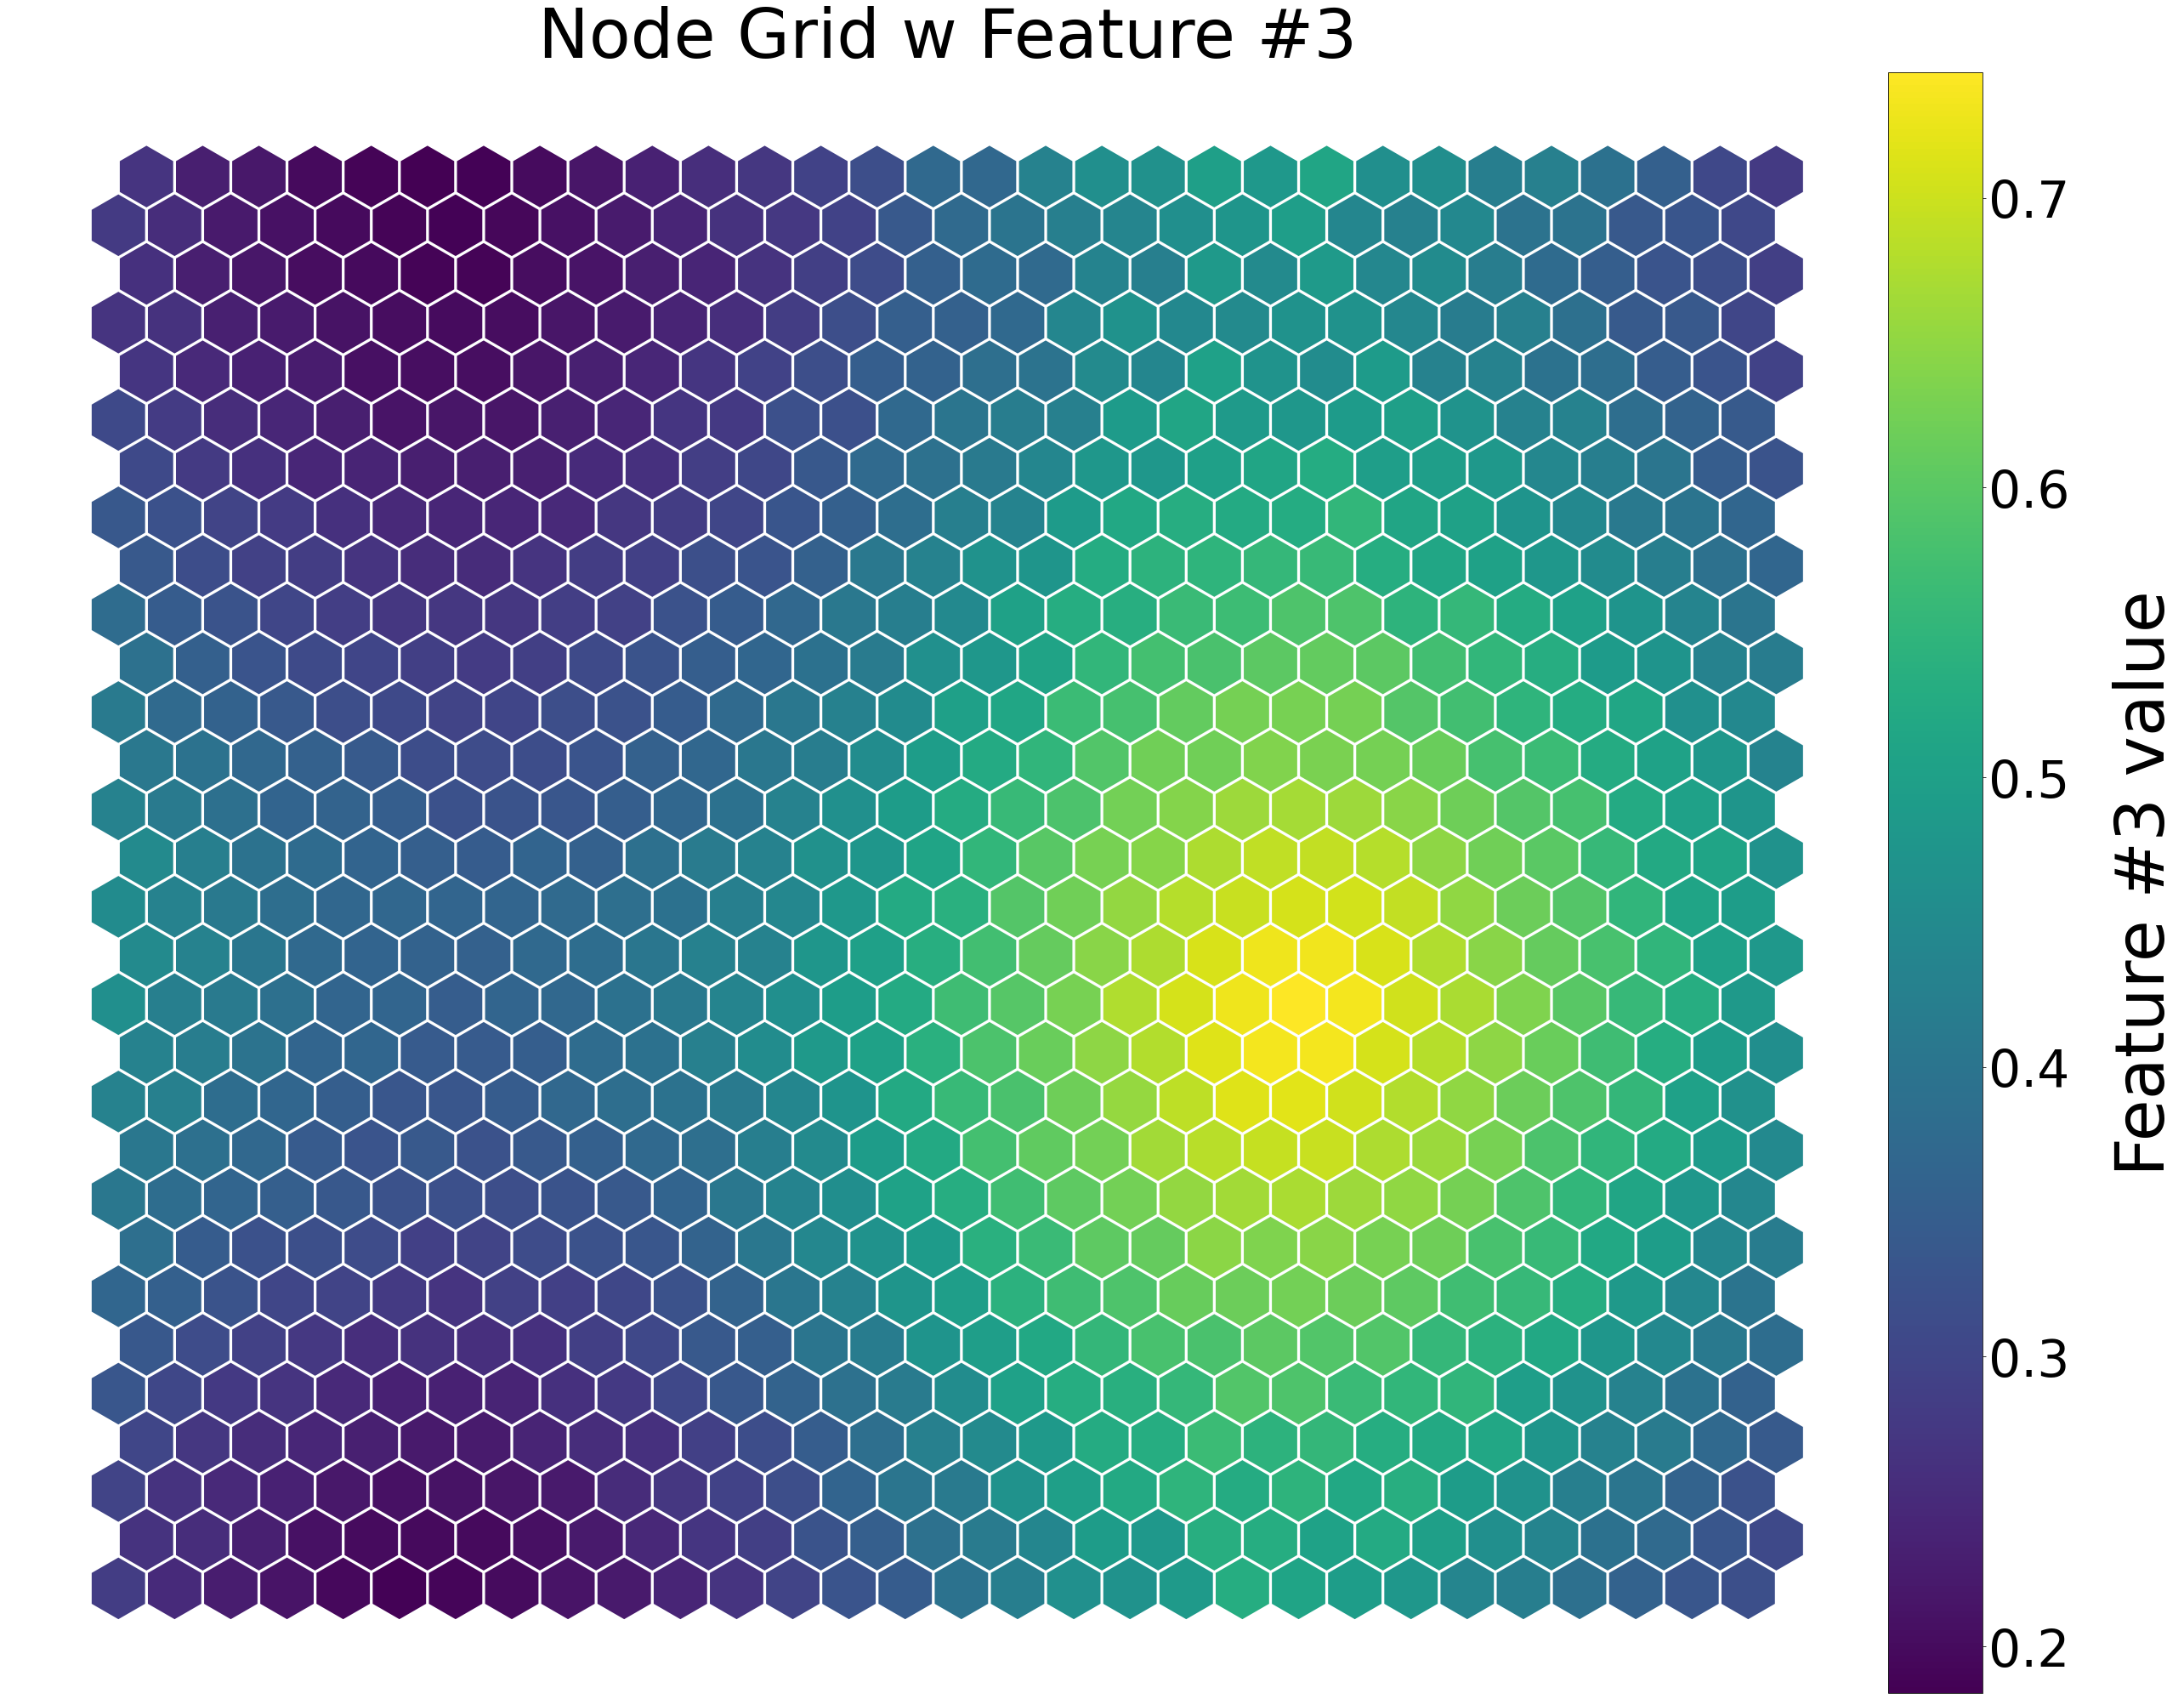

In [ ]:
net.nodes_graph(colnum=3)

### Mapa de componentes de la variable 'widthOfKernel'

Del grafico de componentes para esta variable podemos decir que los vectores prototipos del grupo que se encuentra más a la derecha en el mapa tienen valores de ancho del grano elevados, mientras el resto de grupos tiene valores bajos. 

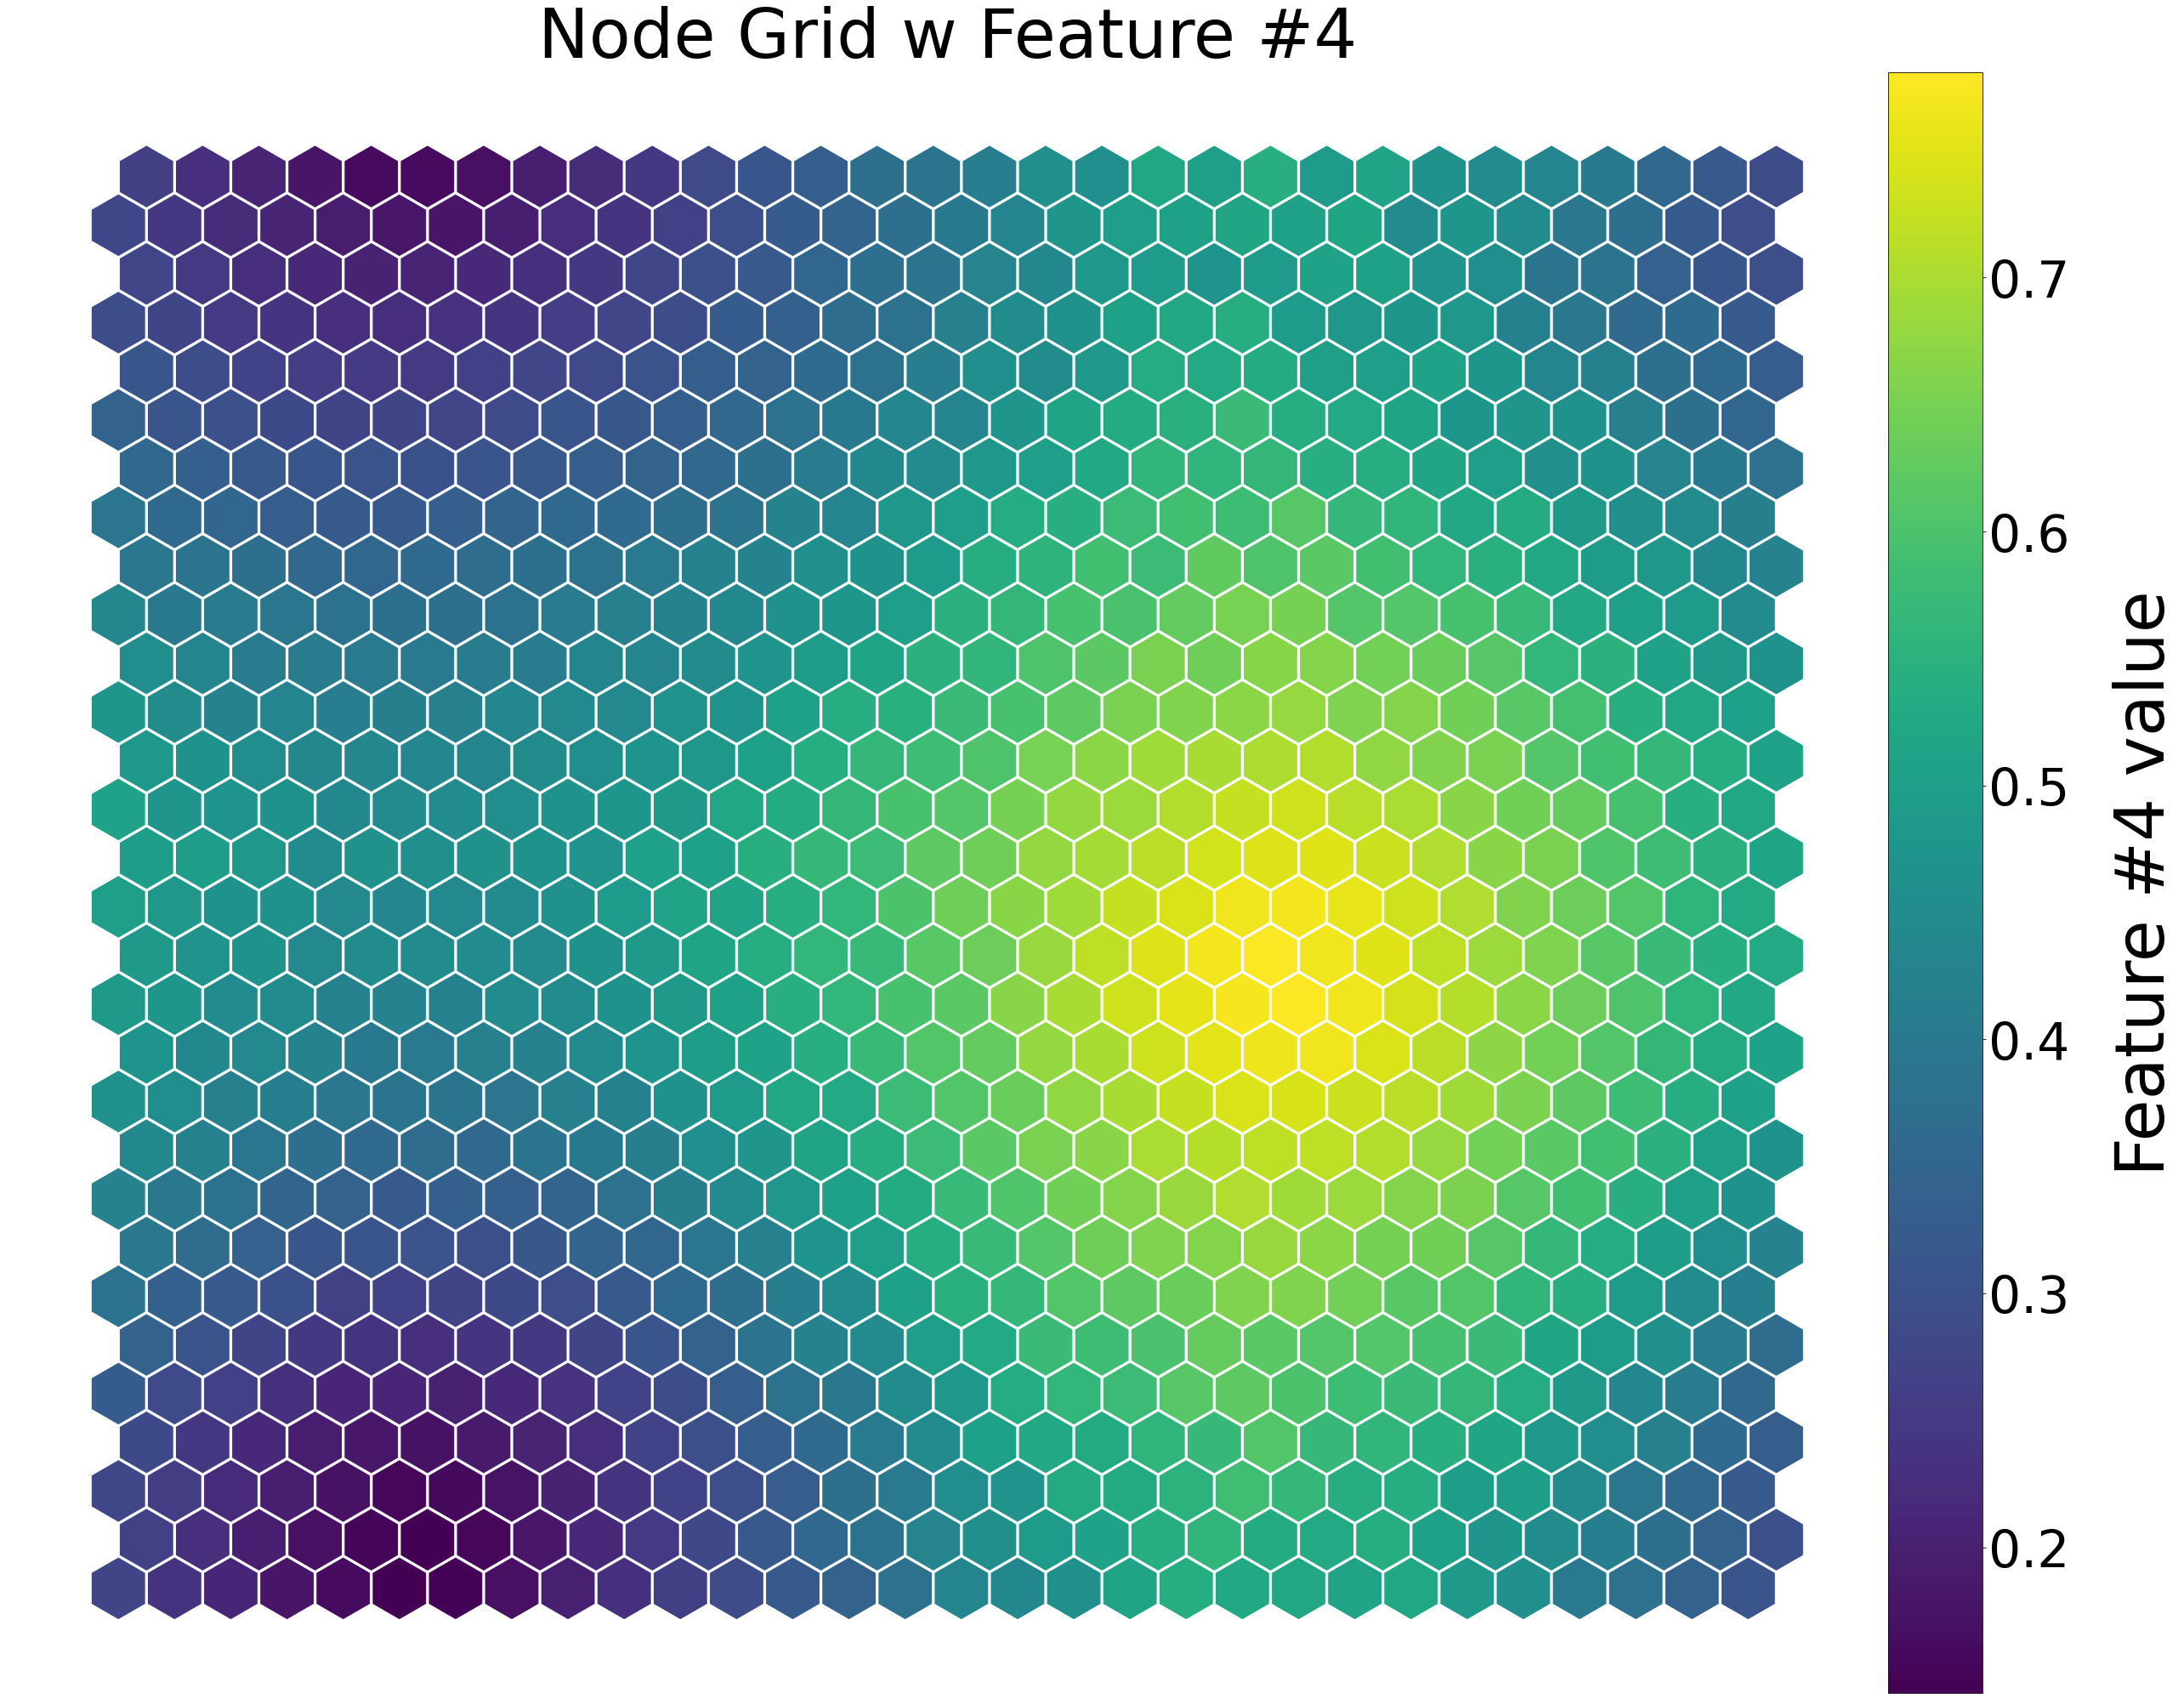

In [ ]:
net.nodes_graph(colnum=4)

### Mapa de componentes de la ariable 'asymmetryCoefficient'

Del grafico de componentes para esta variable podemos decir que los vectores prototipos del grupo que se encuentra más abajo en el mapa tienen valores de coeficiente de asimetría bajos, mientras el resto de grupos tiene valores elevados.

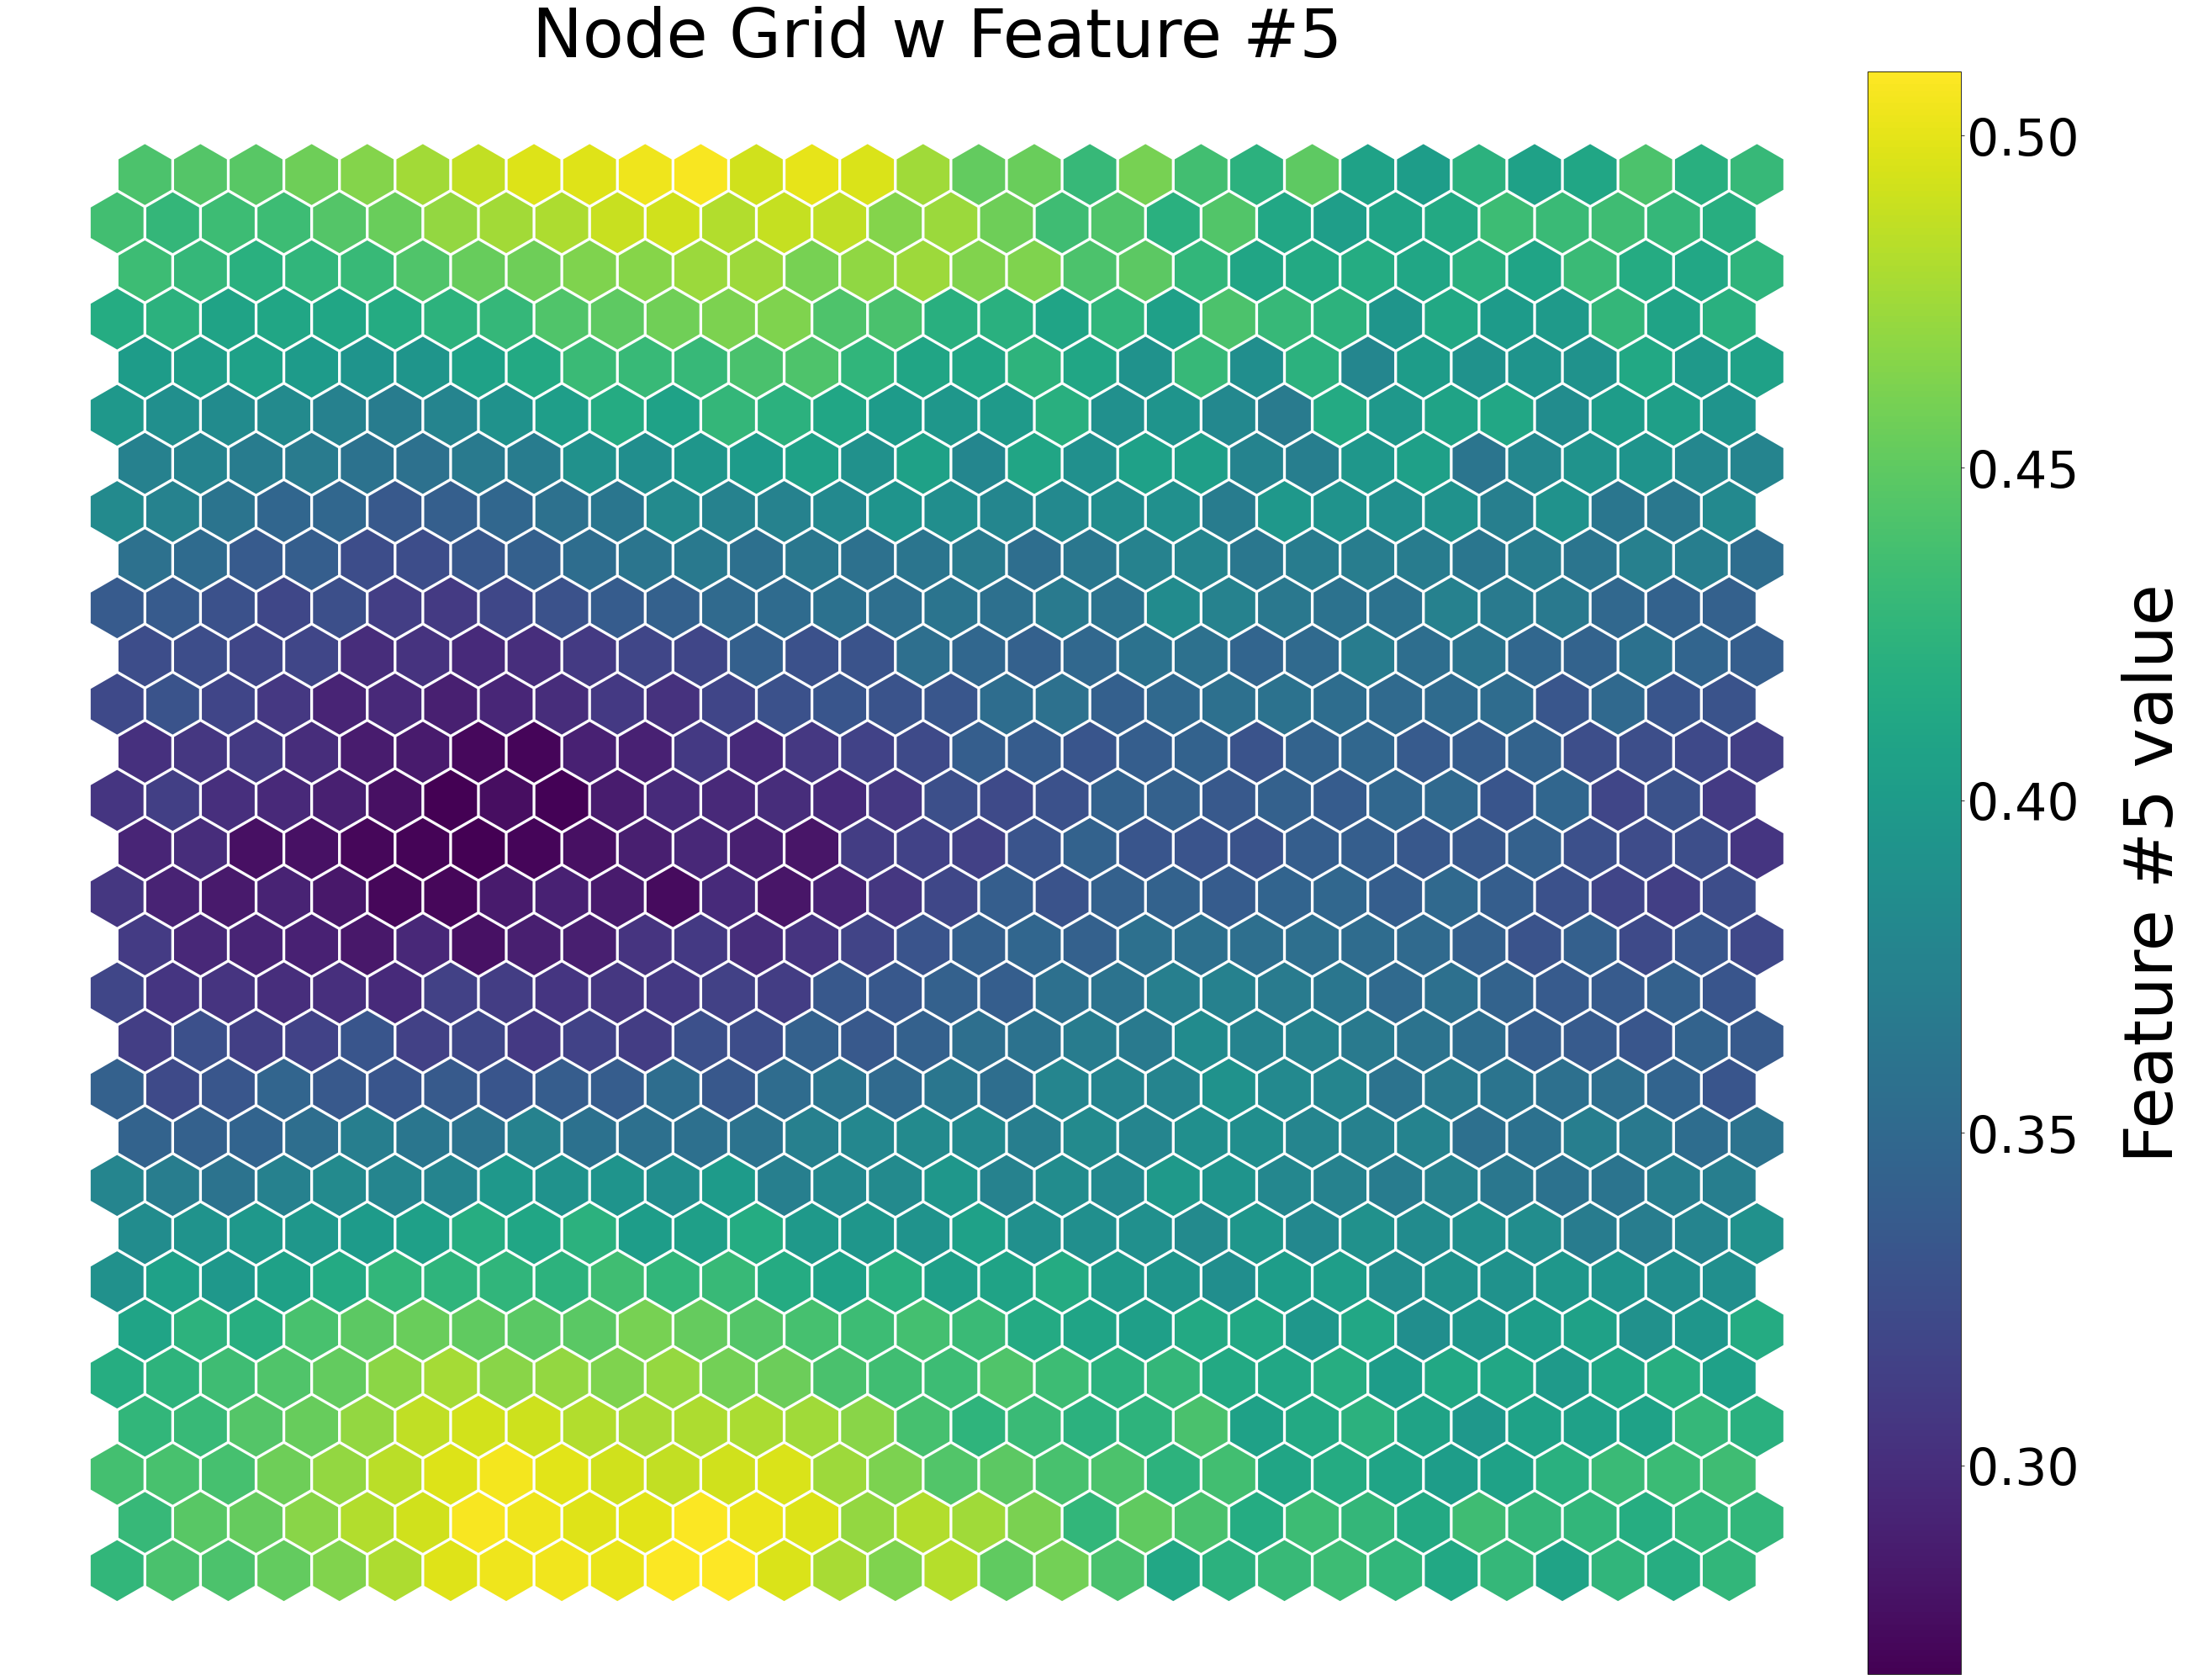

In [ ]:
net.nodes_graph(colnum=5)

### Mapa de componentes de la variable 'lengthOfKernelGroove'

Del grafico de componentes para esta variable podemos decir que los vectores prototipos del grupo que se encuentra más a la derecha en el mapa tienen valores elevados, mientras el resto de grupos tiene valores bajos.

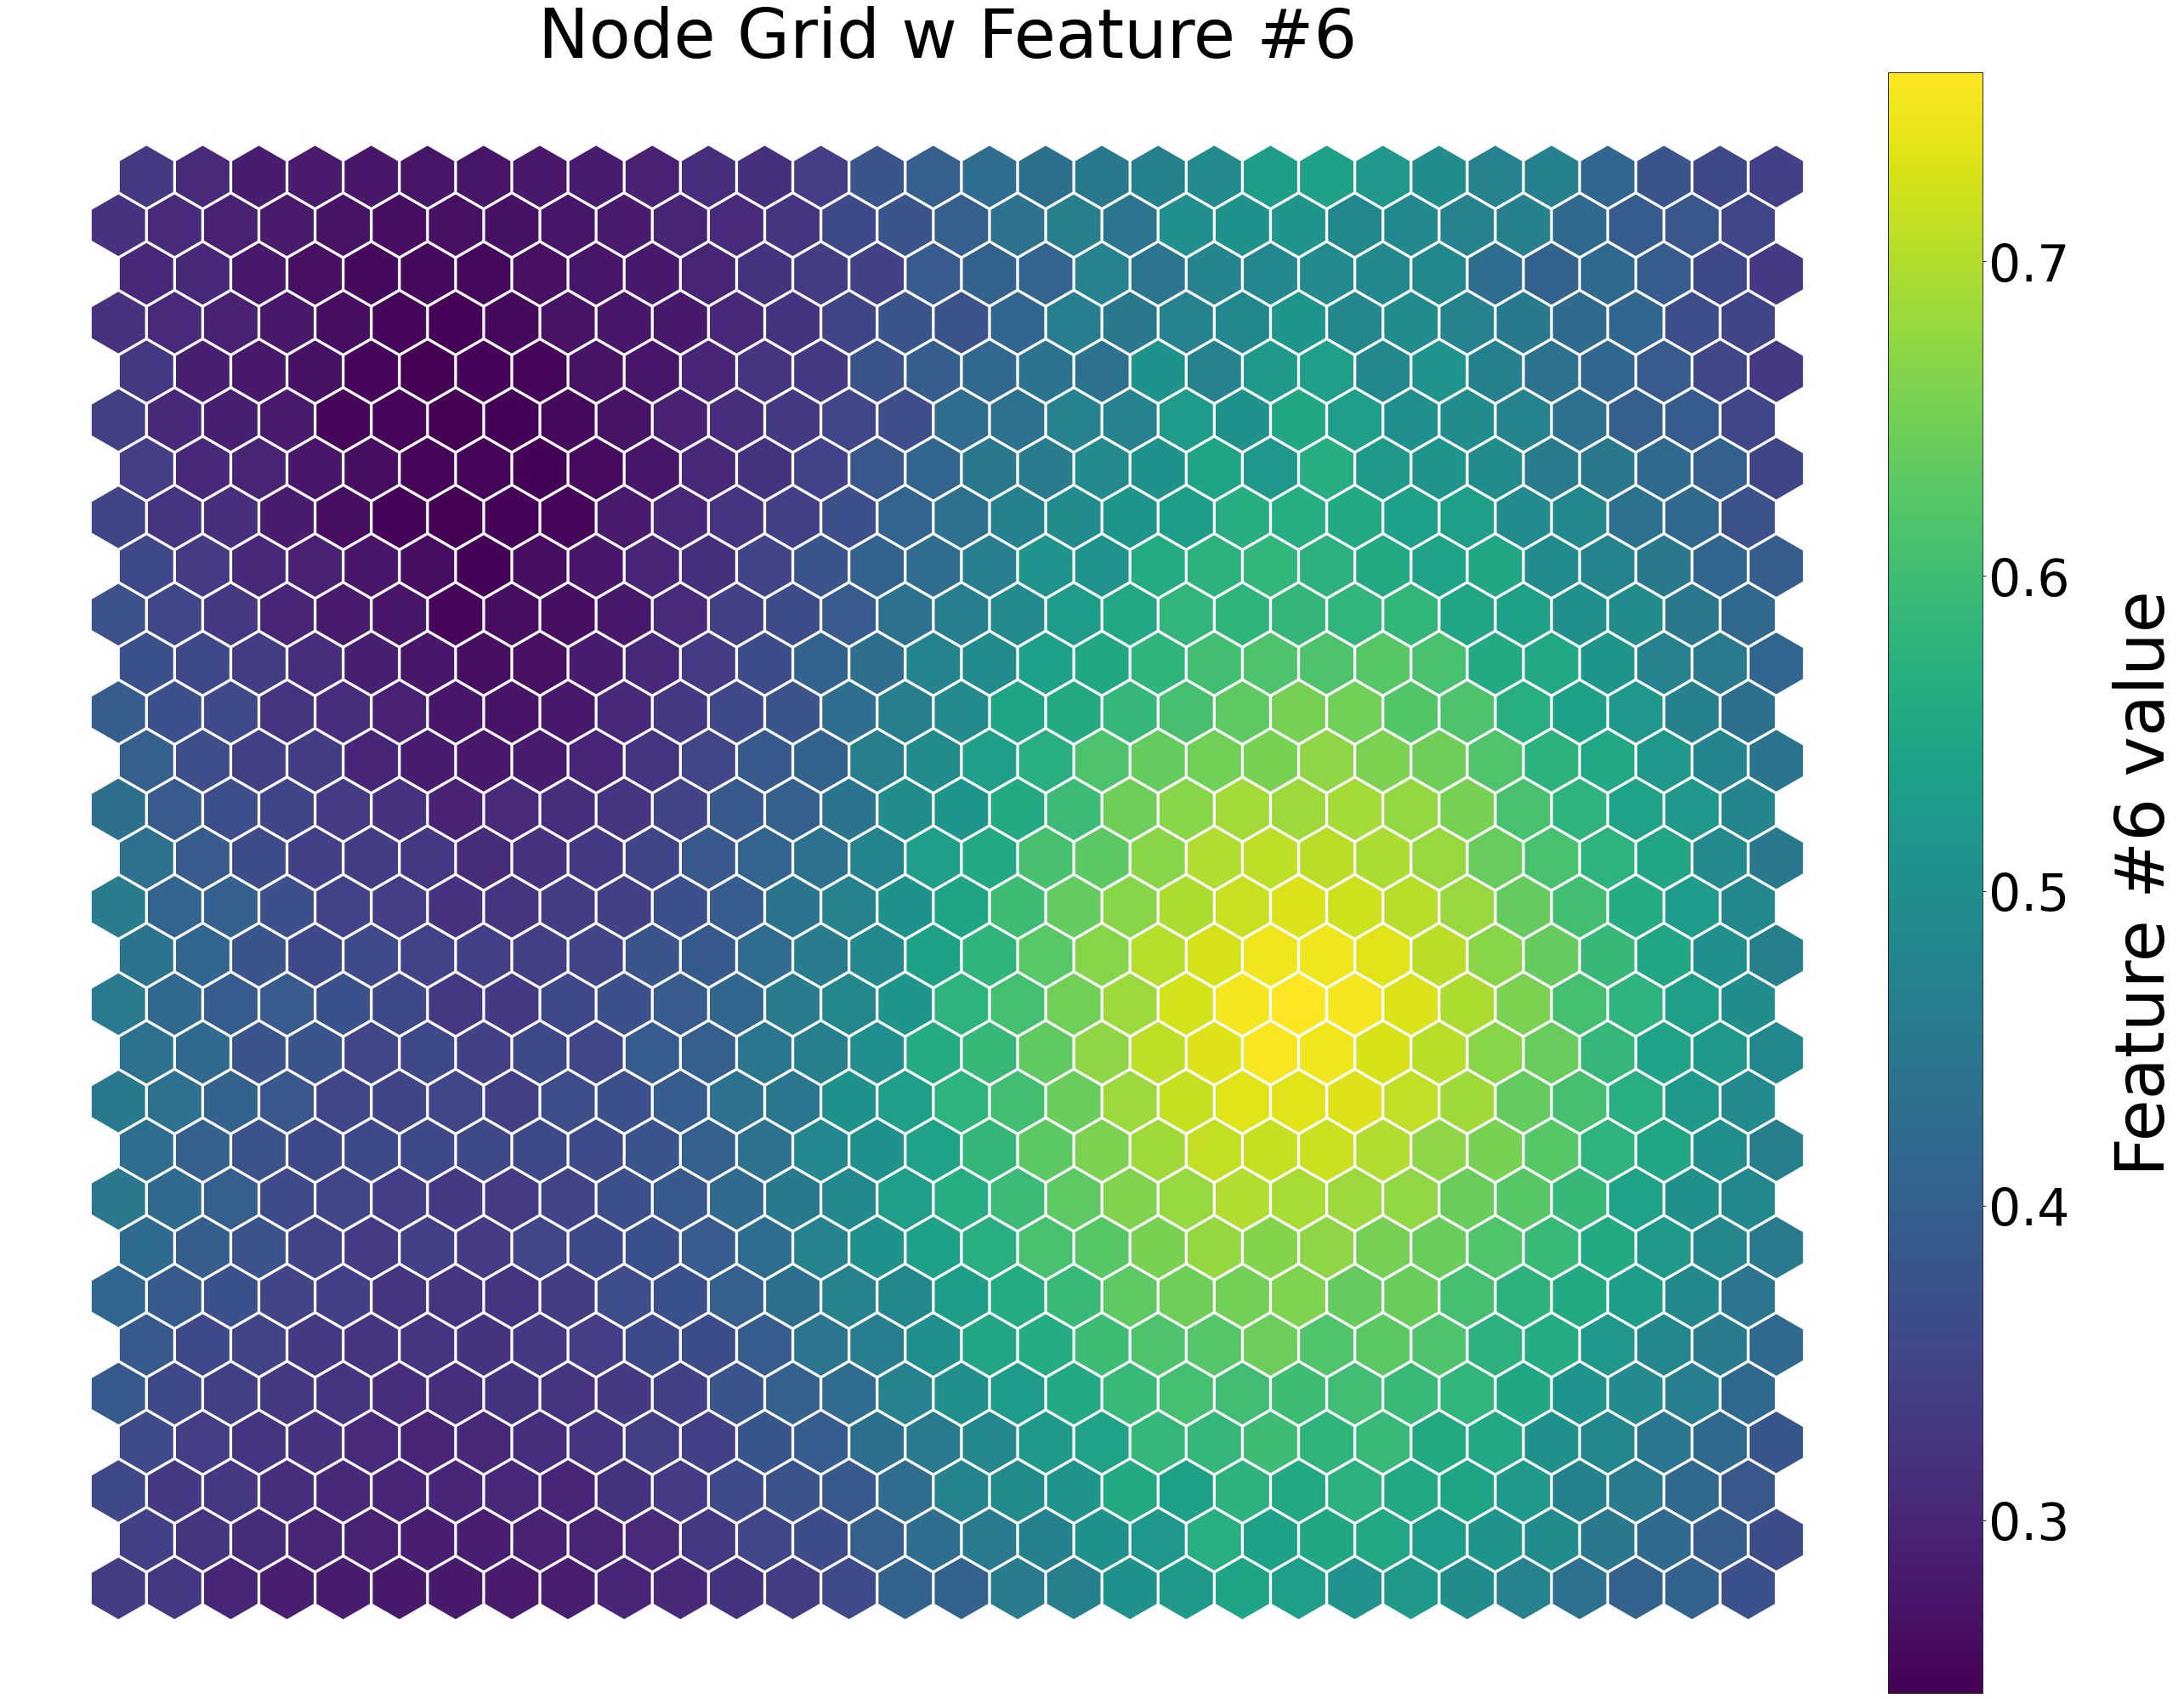

In [ ]:
net.nodes_graph(colnum=6)

# Conclusión

Como conclusión podemos comparar ambos tipos de redes neuronales. Por un lado trabajamos con una  **red neuronal supervisada**, cuyo objetivo principal es aprender a clasificar datos a partir de los dados, y por otro lado trabajamos con una **red neuronal no supervisada**, que tiene como objetivo principal agrupar datos de muchas dimensiones de manera bidimensional (esto lo hace a través de un mapa bi-dimensional) y tratar de extraer alguna información útil de la representación de los datos.

Como podemos ver depende del tipo de objetivo que estemos persiguiendo utilizaremos una red u otra. Si nuestro objetivo es estudiar un determinado set de muestras de datos y extraer conclusiones sobre si existe algún tipo de agrupamiento y cómo se relacionan las variables analizadas entre sí, nos conviene usar una red SOM. Por otro lado, si conocemos las clases o grupos a los que pertenecen nuestro datos y lo que pretendemos es obtener un modelo capaz de predecir a qué clase pertenece un nuevo dato, entonces nos conviene utilizar una red del tipo supervisada. 

Otra cosa a tener en cuenta es ambos algoritmos presentan costos computacionales muy distintos, por un lado la red neuronal supervisada tardó muy poco tiempo en entrenarse mientras que la red neuronal no supervisada (SOM) requirió de mucho más tiempo de procesamiento para su aprendizaje. 


